In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import scipy
import math
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.optimize import brentq
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, rcParams
# Make use of TeX\ufeff
#rc('text',usetex=True)
# Change all fonts to ‘Computer Modern’
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})

## Thermo, clocks, Hubble

In [2]:
#everything in units where c=hbar=1 and the energies are in MeV
me = 0.511
mmu=105.658
alpha_em = 1/137.
e = np.sqrt(alpha_em*4*np.pi)
Mpl = 2.435e21 #reduced planck mass (i.e. factor of 8 pi)
cm2_conv = 2.5e21

def nxrelic(mx, T):
    """
    This computes the number density of dark matter at a certain temperature. Assuming an mx.
    """
    return 4.35e-7 /mx  * 2 *np.pi**2 *T**3* (2 + 7/8 * 6* 4/11)/45

Text(0, 0.5, '$n_\\chi relic$')

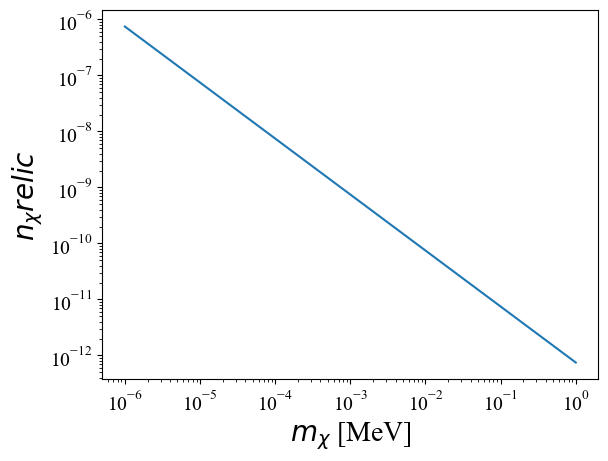

In [31]:
f, ax=plt.subplots()
mlist = np.logspace(-6,0, num=200)
ax.loglog(mlist, [nxrelic(i,0.01) for i in mlist],label='$m_\chi = 10 MeV$')
#ax.set_xlim([1,2e3])
#ax.set_ylim([1e-3,40])
ax.set_xlabel(r'$m_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$n_\chi relic$',fontsize=20)
#ax.legend()

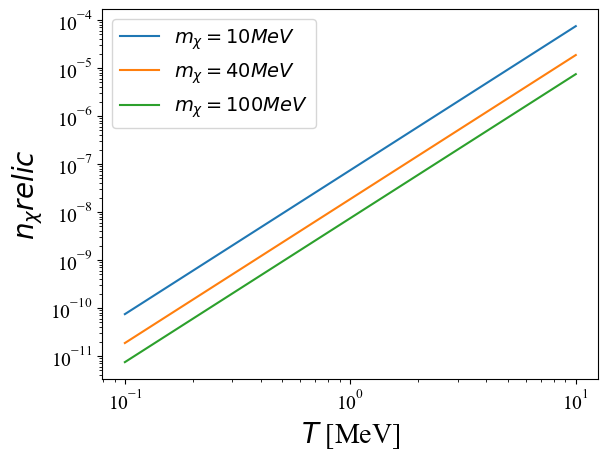

In [3]:
f, ax=plt.subplots()
Tlist = np.logspace(1,-1, num=200)
ax.loglog(Tlist, [nxrelic(10,i) for i in Tlist],label='$m_\chi = 10 MeV$')
ax.loglog(Tlist, [nxrelic(40,i) for i in Tlist],label='$m_\chi = 40 MeV$')
ax.loglog(Tlist, [nxrelic(100,i) for i in Tlist],label='$m_\chi = 100 MeV$')
#ax.set_xlim([1,2e3])
#ax.set_ylim([1e-3,40])
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$n_\chi relic$',fontsize=20)
ax.legend()

In [4]:
def rho_gamma(T):
    """
    energy density of plasmons. 
    """
    return np.pi**2 * T**4/15.
def p_gamma(T):
    """
    pressure density of plasmons.
    """
    return rho_gamma(T)/3.
def s_gamma(T):
    """
    entropy density of plasmons.
    """
    return 4 * rho_gamma(T)/(3.* T)

# The temperature for the following function is the temperature of the neutrinos.

def rho_nu(T):
    """
    energy density of neutrinos.
    """
    return 6*7/8*np.pi**2*T**4/(30.)

def rho_e(T):
    """
    energy density of electrons
    """

    # THIS FUNCTION DOES NOT ADD IN CHEMICAL POTENTIAL OF ELECTRONS

    integral= integrate.quad(lambda E: \
    2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)
    return integral[0]

def n_e(T):
    """
    number density of electrons
    """
    integral= integrate.quad(lambda E: \
    2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)
    return integral[0]
    
def p_e(T):
    """
    pressure density of electron
    """
    integral= integrate.quad(lambda E: \
    2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp(E/T)+1), me, np.inf)
    return integral[0]

def s_e(T):
    """
    entropy density of electron
    """
    return (p_e(T)+rho_e(T))/T

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:49: RuntimeWarning: overflow encountered in exp
  2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp(E/T)+1), me, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:33: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)


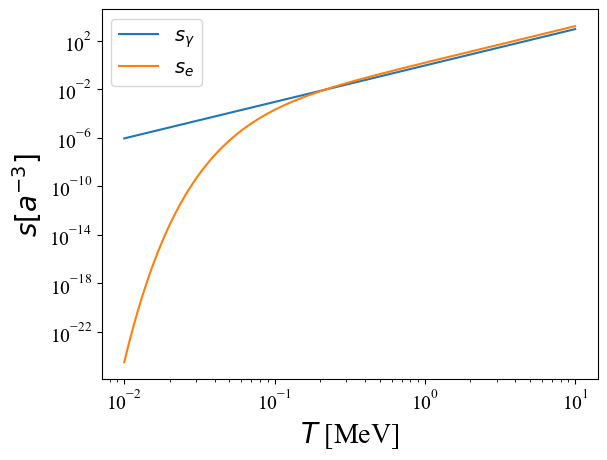

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:41: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)


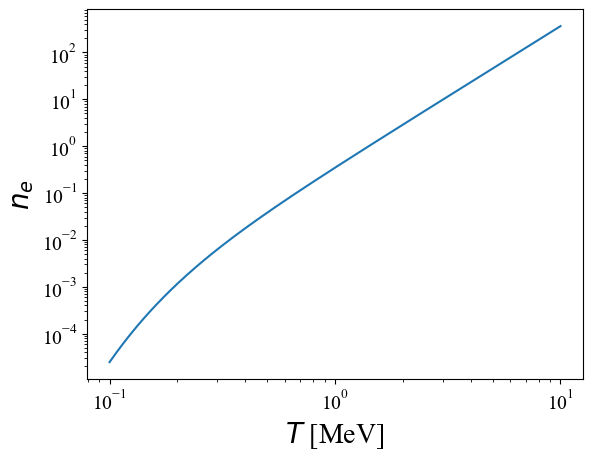

In [5]:
f, ax=plt.subplots()
Tlist = np.logspace(1,-2, num=200)
ax.loglog(Tlist, [s_gamma(i) for i in Tlist],label='$s_\gamma$')
ax.loglog(Tlist, [s_e(i) for i in Tlist],label='$s_e$')
#ax.loglog(Tlist, [nxrelic(100,i) for i in Tlist],label='$m_\chi = 100 MeV$')
#ax.set_xlim([1,2e3])
#ax.set_ylim([1e-3,40])
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$s [a^{-3}]$',fontsize=20)
ax.legend()
plt.show()
f, ax=plt.subplots()
Tlist = np.logspace(1,-1, num=200)
ax.loglog(Tlist, [n_e(i) for i in Tlist],label='$n_e$')
#ax.loglog(Tlist, [nxrelic(100,i) for i in Tlist],label='$m_\chi = 100 MeV$')
#ax.set_xlim([1,2e3])
#ax.set_ylim([1e-3,40])
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$n_e$',fontsize=20)
#ax.legend()
plt.show()

In [6]:
# SECTION FOR CONVERTING BETWEEN a AND T
# Include chemical potential of electrons here.

s_const = (s_e(10)+s_gamma(10))/(10.0591)**3 #define a=1 at T= 1 MeV

def T_full(a):
    """
    Tracking entropy to convert between a and T. 
    """
    return fsolve(lambda T:\
    (s_e(T)+s_gamma(T))*a**3 - s_const, 1/a)

alist = np.logspace(2.5,-2.5, num=1000)
Tfull_list = np.array([T_full(i)[0] for i in alist])
T = interp1d(alist, Tfull_list)

def a_full(T):
    return fsolve(lambda a:\
    (s_e(T)+s_gamma(T))*a**3 - s_const, 1/T)

Tlist = np.logspace(2.5, -2.5, num=1000)
afull_list = np.array([a_full(i)[0] for i in Tlist])
a = interp1d(Tlist, afull_list)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:49: RuntimeWarning: overflow encountered in exp
  2/(3*np.pi**2)*np.sqrt(E**2-me**2)**3/(np.exp(E/T)+1), me, np.inf)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:33: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)


Text(1.5, 0.05, '$T\\sim (11/4)^{1/3} a^{-1}$')

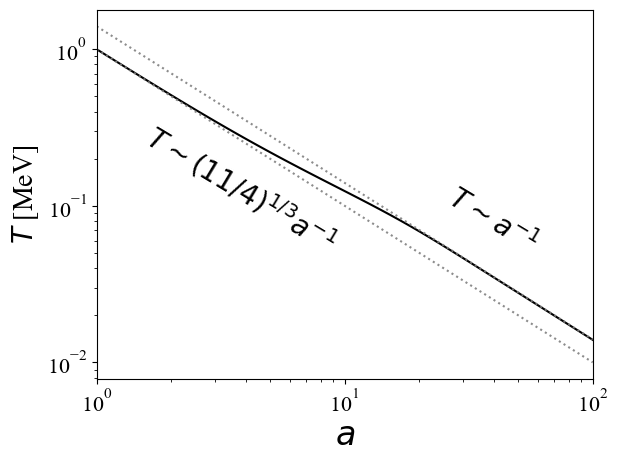

In [8]:
f, ax = plt.subplots()

alist = np.logspace(0, 2)
Tlist = np.logspace(2, -2)

ax.loglog(alist, T(alist),c='black')
ax.loglog(alist, 1/alist, c="gray", alpha=0.9, ls=":")
#ax.semilogx(Tlist, Tlist*a(Tlist))
ax.loglog(alist, (11/4.)**(1/3.)/alist, c="gray", alpha=0.9, ls=":")
#ax.set_xticklabels([0,1,10])
#ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30])
#ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30])
ax.set_xlim([1, 100])
#ax.set_ylim([0.02, 2])
ax.set_ylabel(r'$T$ [MeV]', fontsize=20)
ax.set_xlabel(r'$a$', fontsize=24)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.text(25, 0.05, r'$T\sim a^{-1}$', rotation=-31,fontsize=20)
ax.text(1.5, 0.05, r'$T\sim (11/4)^{1/3} a^{-1}$', rotation=-31,fontsize=20)

#plt.savefig("temp_evolve.pdf",bbox_inches='tight')

In [9]:
def H_full(aH):
    """
    hubble parameter. We can see the neutrino energy density doesn't really matter.
    """
    TH = T(aH)
    return np.sqrt((rho_gamma(TH)+rho_e(TH)+rho_nu(10)*(a(10)/aH)**4)/(3*Mpl**2))

alist = np.logspace(2.5, -2.5, num=5000)
Hfull_list = np.array([H_full(i) for i in alist])
H = interp1d(alist, Hfull_list)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:33: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E**2 * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)


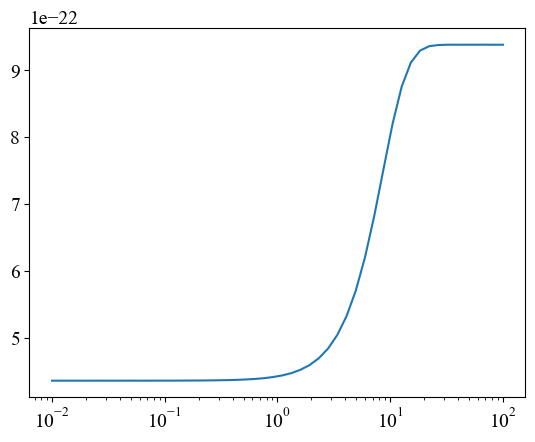

In [33]:
f, ax = plt.subplots()

alist = np.logspace(-2, 2)
Tlist = np.logspace(2, -2)

ax.semilogx(alist, a(Tlist)**2*H(alist))#[i**2*H(i) for i in alist])
#ax.semilogx(Tlist, a(Tlist)**2*H(a(Tlist)))#[a(i)**2*H(a(i)) for i in Tlist])

#ax.semilogx(alist, 0.01**2*H(0.01)*np.ones_like(alist)\
            #*np.sqrt((2*(11/4)**(4/3.) + 21/4)/(2 + 7/2. + 21/4 )))

# Hubble parameter as a function of a.


# add chemical potential due to imbalance between electrons and positrons.

## Plasma things

In [11]:
def wp_full(T): #flag to make draft more clear about factor of 2
    # Add chemical potential
    """
    plasma frequency.
    """
    integral = integrate.quad(lambda p: 8*alpha_em/np.pi\
                *p**2/np.sqrt(p**2+me**2)*(1 - p**2/(3*(p**2+me**2)))\
                *1/(1+np.exp(np.sqrt(p**2+me**2)/T))
                              , 0, np.inf)
    return np.sqrt(integral[0])

Tlist = np.logspace(2.5, -2.5, num=500)
wp_list = np.array([wp_full(i) for i in Tlist])
wp = interp1d(Tlist, wp_list)

def wp_high(T):
    """
    High temp plasma frequency behaviour.
    """
    return np.sqrt(4*np.pi*alpha_em* T**2/9)

def wp_low(T):
    """ 
    Low temp behaviour.
    """
    return np.sqrt(4*np.pi*alpha_em*n_e(T)/me)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3262838980.py:8: RuntimeWarning: overflow encountered in exp
  *1/(1+np.exp(np.sqrt(p**2+me**2)/T))


/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3076428108.py:41: RuntimeWarning: overflow encountered in exp
  2/np.pi**2*E * np.sqrt(E**2-me**2)/(np.exp(E/T)+1), me, np.inf)


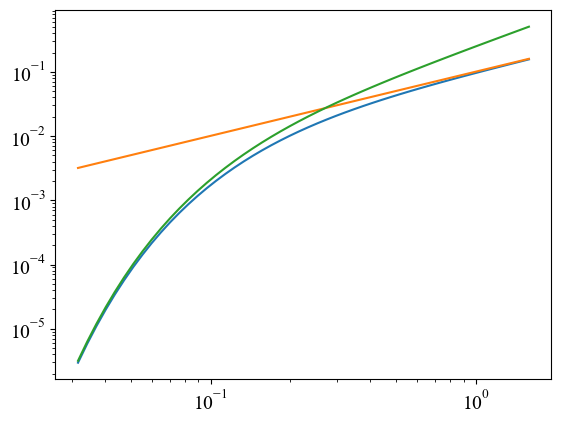

In [12]:
f, ax = plt.subplots()
Tlist = np.logspace(0.2, -1.5)

ax.loglog(Tlist, wp(Tlist))#[wp(i) for i in Tlist])
ax.loglog(Tlist, wp_high(Tlist))#[ for i in Tlist])
ax.loglog(Tlist, [wp_low(i) for i in Tlist])

In [13]:
def w1_full(T):
    # chemical potential
    integral = integrate.quad(lambda p: 8*alpha_em/np.pi\
                *p**2/np.sqrt(p**2+me**2)*\
                (5*p**2/(3*(p**2+me**2))-p**4/((p**2+me**2)**2))\
                *1/(1+np.exp(np.sqrt(p**2+me**2)/T))
                              , 0, np.inf)
    return np.sqrt(integral[0])

Tlist = np.logspace(2.5, -2.5, num=500)
w1_list = np.array([w1_full(i) for i in Tlist])
w1 = interp1d(Tlist, w1_list)

def vstar(T):
    """ 
    Typical velocity of electron in the plasma.
    """
    return w1(T)/wp(T)

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/713913594.py:6: RuntimeWarning: overflow encountered in exp
  *1/(1+np.exp(np.sqrt(p**2+me**2)/T))


(0.0, 1.05)

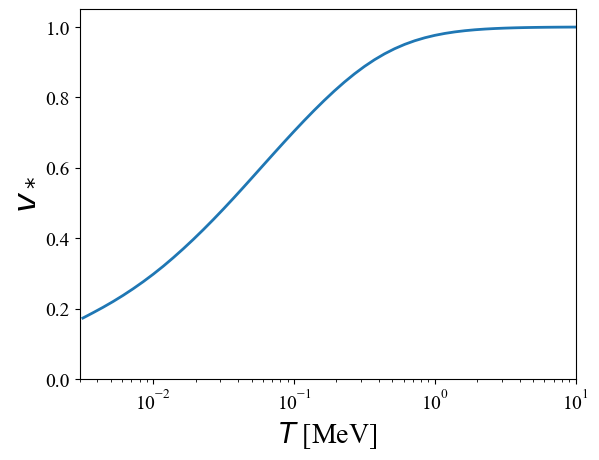

In [14]:
f, ax = plt.subplots()
Tlist = np.logspace(1, -2.5)

ax.semilogx(Tlist, vstar(Tlist), lw=2)#(i) for i in Tlist])
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_ylabel(r'$v_*$', fontsize=24)
ax.set_xlim([0.003, 10])
ax.set_ylim([0, 1.05])

In [16]:
# Bunch of stuff from Braten and Siegel

def Pi_ell(T, k, omega):
    wpP = wp(T)
    vs = vstar(T)
    return 3*wpP**2/vs**2 *(omega/(2*vs*k)*\
            np.log((omega + vs*k)/(omega- vs*k))-1)

def Pi_t(T, k, omega):
    wpP = wp(T)
    vs = vstar(T)
    return 3*wpP**2/(2*vs**2)*(omega**2/k**2 \
    -omega*(omega**2-vs**2*k**2)/(2*vs*k**3)\
    *np.log((omega + vs*k)/(omega- vs*k)))

def kmax(T):
    wpP = wp(T)
    vs = vstar(T)
    return np.sqrt(3/vs**2* (1/(2*vs)*np.log((1+vs)/(1-vs))-1))*wpP

def omega_ell(T, k):
    if type(k)==int or type(k)== float or type(k)== np.float64:
        if k>kmax(T):
            return 0
        else:
            return fsolve(lambda w: Pi_ell(T, k, w)-k**2, k)
    else:
        km = kmax(T)
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            if k[i] < km:
                kudu[i] = fsolve(lambda w: Pi_ell(T, k[i], w)-k[i]**2, k[i])
        return kudu
    
def omega_t(T, k):
    return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)

def m_ell(T, k):
    if type(k) == int or type(k) == float or type(k)== np.float64:
        if k>kmax(T):
            return 0
        else:
            return np.sqrt(omega_ell(T, k)**2 - k**2)
        
    else:
        km = kmax(T)
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            if k[i] < km: 
                kudu[i] = np.sqrt(omega_ell(T, k[i])**2 - k[i]**2)
        return kudu
    
def m_t(T, k):
    """ 
    This is m_t from equation 2 in the paper
    """
    return np.sqrt(omega_t(T, k)**2 - k**2)

def Z_ell(T, k):
    km = kmax(T)
    if type(k) == int or type(k) == float or type(k)== np.float64:
        if k>km:
            return 0
        else: 
            wpP = wp(T)
            vs = vstar(T)
            wl = omega_ell(T, k)
            return 2*(wl**2- vs**2*k**2)/(3 *wpP**2 -(wl**2-vs**2*k**2))
    else:
        wpP = wp(T)
        vs = vstar(T)
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            wl = omega_ell(T, k[i])
            if k[i]<km:
                kudu[i] = 2*(wl**2- vs**2*k[i]**2)/(3 *wpP**2 -(wl**2-vs**2*k[i]**2))
        #print(kudu)
        return kudu
    
def Z_t(T, k):
    wt = omega_t(T, k)
    wpP = wp(T)
    vs = vstar(T)
    return 2*wt**2 *(wt**2 - vs**2*k**2)/\
    (3*wpP**2 *wt**2 + (wt**2 +k**2)*(wt**2 - vs**2 * k**2)- 2*wt**2*(wt**2-k**2))

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/1976017234.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kudu[i] = np.sqrt(omega_ell(T, k[i])**2 - k[i]**2)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/1976017234.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kudu[i] = 2*(wl**2- vs**2*k[i]**2)/(3 *wpP**2 -(wl**2-vs**2*k[i]**2))


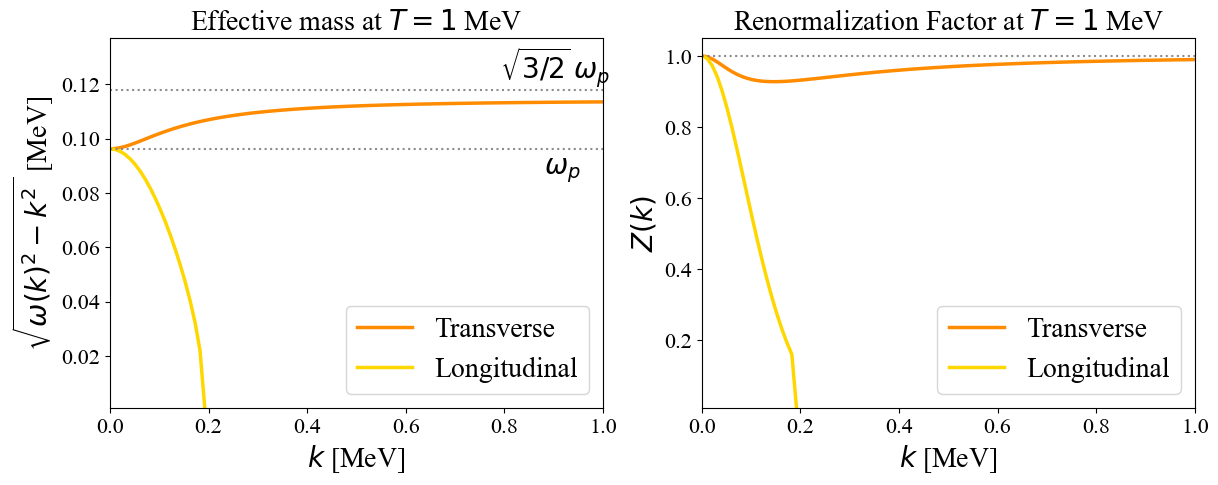

In [17]:
f, axs = plt.subplots(1,2)
klist = np.linspace(0.001,1, num=100)

plot_temp=1

ax=axs[0]
ax.plot(klist, m_t(plot_temp, klist),lw=2.5,c="darkorange")#[m_t(plot_temp, i) for i in klist])
ax.plot(klist, m_ell(plot_temp, klist),lw=2.5,c='gold')
ax.plot(klist, wp(plot_temp)*np.ones_like(klist),  c="gray", alpha=0.9, ls=":")
ax.plot(klist, np.sqrt(3/2)*wp(plot_temp)*np.ones_like(klist), c="gray", alpha=0.9, ls=":")

#ax.set_ylabel(r'$m_\mathrm{eff}$ [MeV]', fontsize=20)
ax.set_ylabel(r'$\sqrt{\omega(k)^2 - k^2\,}$ [MeV]', fontsize=20)
ax.set_xlabel(r'$k$ [MeV]', fontsize=20)
ax.set_title(r'Effective mass at $T= 1$ MeV', fontsize=20)
ax.set_xlim([0, 1])
ax.set_ylim([0.001, 0.137])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.text(0.79, 0.122, r'$\sqrt{3/2}\, \omega_p$',fontsize=20)
ax.text(0.88, 0.087, r'$\omega_p$',fontsize=20)

ax.legend(['Transverse', 'Longitudinal'], fontsize=20)
#f.set_size_inches(6.2, 4.8)

ax=axs[1]
ax.plot(klist, Z_t(plot_temp, klist),lw=2.5, c='darkorange')
ax.plot(klist, Z_ell(plot_temp, klist),lw=2.5, c='gold')
ax.plot(klist, np.ones_like(klist), c="gray", alpha=0.9, ls=":")

ax.set_ylabel(r'$Z(k)$', fontsize=20)
ax.set_xlabel(r'$k$ [MeV]', fontsize=20)
ax.set_title(r'Renormalization Factor at $T= 1$ MeV', fontsize=20)
ax.set_xlim([0, 1])
ax.set_ylim([0.01, 1.05])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)


ax.legend(['Transverse', 'Longitudinal'], fontsize=20)
#ax.text(0.07, 0.12, r'$m_\mathrm{eff} =\sqrt{3/2}\, m_p$')
#ax.text(0.4, 0.099, r'$m_\mathrm{eff} =m_p$')

f.set_size_inches(14, 4.8)

#plt.savefig("m_eff_Zk.pdf",bbox_inches='tight')

## Annihilation

In [18]:
# These sections are good

def gamma_ann(Q, mx, T,muon=True):
    """ 
    Reaction rate of e+e- 
    Focus on case of no muons
    """
    if muon==False:
        if np.size(T)==1:
            integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
            *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
            *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
            *scipy.special.kn(1, np.sqrt(s)/T) *T/(2*np.pi)**3
            return integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]
        else:
            kudu = np.zeros_like(T)
            for i in range(len(T)):
                t = T[i]
                integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
                *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
                *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
                *scipy.special.kn(1, np.sqrt(s)/t) *t/(2*np.pi)**3
                kudu[i] = integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]
            return kudu
    else:
        if np.size(T)==1:
            
            integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
            *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
            *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
            *scipy.special.kn(1, np.sqrt(s)/T) *T/(2*np.pi)**3
            
            integrandmu = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
            *(s**2 +1/3*(s-4*mmu**2)*(s-4*mx**2)+4*s*(mx**2+mmu**2))\
            *1/(8*np.pi)*np.sqrt(1-4*mmu**2/s)*np.sqrt(s)\
            *scipy.special.kn(1, np.sqrt(s)/T) *T/(2*np.pi)**3
            
            return integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]\
            +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]
        else:
            kudu = np.zeros_like(T)
            for i in range(len(T)):
                t = T[i]
                
                integrand = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
                *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
                *1/(8*np.pi)*np.sqrt(1-4*me**2/s)*np.sqrt(s)\
                *scipy.special.kn(1, np.sqrt(s)/t) *t/(2*np.pi)**3
                
                integrandmu = lambda s: Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mx**2/s)\
                *(s**2 +1/3*(s-4*mmu**2)*(s-4*mx**2)+4*s*(mx**2+mmu**2))\
                *1/(8*np.pi)*np.sqrt(1-4*mmu**2/s)*np.sqrt(s)\
                *scipy.special.kn(1, np.sqrt(s)/t) *t/(2*np.pi)**3
                
                kudu[i] = integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]+\
                +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]
            
            return kudu

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/1192890120.py:38: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return integrate.quad(integrand, max(4*me**2, 4*mx**2), np.inf)[0]\
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/1192890120.py:39: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  +integrate.quad(integrandmu, 4*mmu**2, np.inf)[0]
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/1192890120.py:39: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  +integrate.quad(int

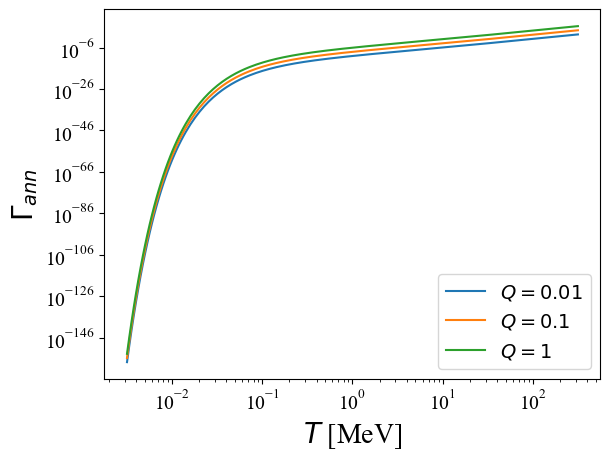

In [19]:
f, ax=plt.subplots()
Tlist = np.logspace(2.5,-2.5, num=200)
ax.loglog(Tlist, [gamma_ann(0.01,0.04,i) for i in Tlist],label='$Q=0.01$')
ax.loglog(Tlist, [gamma_ann(0.1,0.04,i) for i in Tlist],label='$Q=0.1$')
ax.loglog(Tlist, [gamma_ann(1,0.04,i) for i in Tlist],label='$Q=1$')
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$\Gamma_{ann}$',fontsize=20)
ax.legend()
plt.show()

## Plasmons

In [20]:
# Section is good

def long_integrand(Q, mx, T, k):
    """
    longitudional case
    """
    if type(k) == int or type(k) == float or type(k)== numpy.float64:
        ml = m_ell(T, k)
        if mx>ml/2:
            return 0
        elif k>kmax(T):
            return 0
        else:
            wl = np.sqrt(ml**2+k**2)#omega_ell(T, k)
            return Q**2*e**2/(2*np.pi)**3*k**2\
            *Z_ell(T, k)*wl*(ml**2+2*mx**2)\
            *np.sqrt(ml**2*(ml**2-4*mx**2))\
            /(3*ml**4*(np.exp(wl/T)-1))
    else:
        kudu = np.zeros_like(k)
        for i in range(len(k)):
            ml = m_ell(T, k[i])
            km=kmax(T)
            if mx<ml/2 and k[i]<km:
                wl = np.sqrt(ml**2+k[i]**2)#omega_ell(T, k[i])
                kudu[i] = Q**2*e**2/(2*np.pi)**3*k[i]**2\
                *Z_ell(T, k[i])*wl*(ml**2+2*mx**2)\
                *np.sqrt(ml**2*(ml**2-4*mx**2))\
                /(3*ml**4*(np.exp(wl/T)-1))
        return kudu

def trans_integrand(Q, mx, T, k):
    """
    transverse case
    """
    mt = m_t(T, k)
    if mx>mt/2:
        return 0
    else:
        wt = np.sqrt(mt**2+k**2)#omega_t(T, k)
        return 2*Q**2*e**2/(2*np.pi)**3*k**2\
        *Z_t(T, k)*(mt**2+2*mx**2)*np.sqrt(mt**2*(mt**2 - 4*mx**2))\
        /(3*wt*mt**2 *(np.exp(wt/T)-1))
        
def kkin_trans(mx, T):
    return brentq(lambda k: m_t(T, k)-2*mx, 1e-3,10*T)#fsolve(lambda k: m_t(T, k)-2*mx, mx)

def kkin_long(mx, T):
    return fsolve(lambda k: m_ell(T, k)-2*mx, mx)
    
def gamma_long(Q, mx, T):
    """
    longitudional reaction rate of plasmon reactions
    """
    if mx>wp(T)/2:
        return 0
    #kkin = kkin_long(mx, T)
    else:
        #return integrate.quadrature(lambda k: long_integrand(Q,mx,T,k),0, kmax(T), tol=1e-9)
        return integrate.quad(lambda k: long_integrand(Q,mx,T,k),0, kmax(T))[0]#,min(kmax(T), kkin))[0]


def gamma_trans(Q, mx, T):
    """
    transverse reaction rate of plasmon reactions
    """
    if mx>np.sqrt(3/2.)*wp(T)/2:
        return 0
    else:
    #kkin = kkin_trans(mx, T)
        return integrate.quad(lambda k: trans_integrand(Q,mx,T,k),0, np.inf)[0]#,kkin)[0]
    #, np.inf)[0]#
    

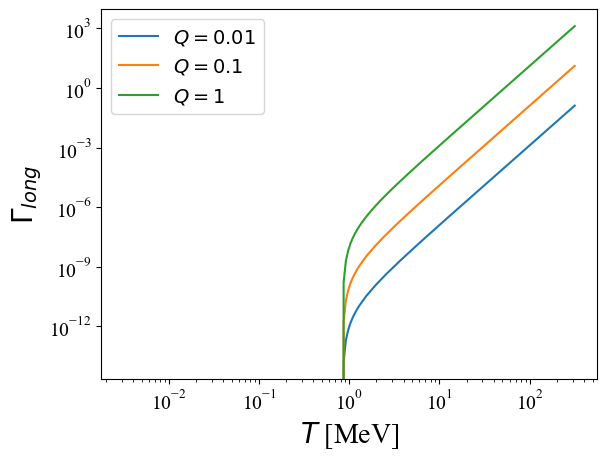

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3132527472.py:43: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))
/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


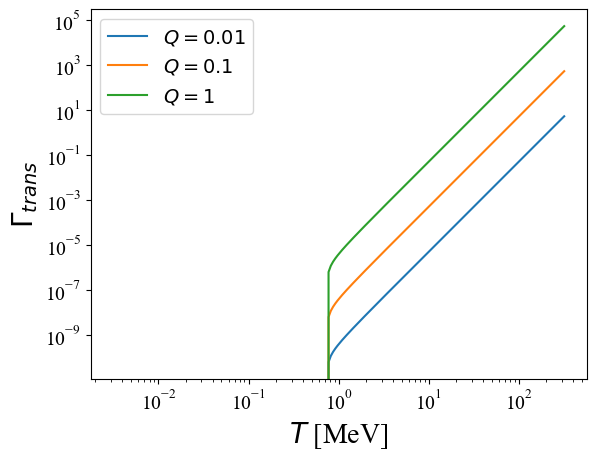

In [21]:
f, ax=plt.subplots()
Tlist = np.logspace(2.5,-2.5, num=200)
ax.loglog(Tlist, [gamma_long(0.01,0.04,i) for i in Tlist],label='$Q=0.01$')
ax.loglog(Tlist, [gamma_long(0.1,0.04,i) for i in Tlist],label='$Q=0.1$')
ax.loglog(Tlist, [gamma_long(1,0.04,i) for i in Tlist],label='$Q=1$')
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$\Gamma_{long}$',fontsize=20)
ax.legend()
plt.show()

f, ax=plt.subplots()
Tlist = np.logspace(2.5,-2.5, num=200)
ax.loglog(Tlist, [gamma_trans(0.01,0.04,i) for i in Tlist],label='$Q=0.01$')
ax.loglog(Tlist, [gamma_trans(0.1,0.04,i) for i in Tlist],label='$Q=0.1$')
ax.loglog(Tlist, [gamma_trans(1,0.04,i) for i in Tlist],label='$Q=1$')
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('$\Gamma_{trans}$',fontsize=20)
ax.legend()
plt.show()

## GEtting the right relic abundance

In [25]:
def relic_ann(Q, mx, whole_shebang=False, muon=True):
    """ 
    Given a value of Q and mx returns the number density over relic abundance due to e+e- annihilations.
    """
    #Tlist = np.logspace(2, -1.6)
    Tlist = np.logspace(2.5, -1.5,num=200)
    gamma_list = [gamma_ann(Q, mx, i,muon=muon) for i in Tlist]
    gamma=interp1d(Tlist, gamma_list)
    #alist = np.logspace(-1.9, 1.5)
    alist = np.logspace(-2.4, 1.12,num=200)
    gulu = integrate.odeint(lambda n, a: \
            - 3*n/a +2/(a*H(a))*gamma(T(a)), [0], alist)
    if whole_shebang:
        print(gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3)
        return gulu.flatten()
    else:
        return gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3
    
    
def gamma_tot(Q, mx, T, muon=True):
    """ 
    total reaction rate of plasmon decay
    """
    return gamma_ann(Q, mx, T, muon=muon)+gamma_long(Q, mx, T)+gamma_trans(Q, mx, T)


def relic(Q, mx, whole_shebang=False, muon=True):
    """ 
    Returns number density over relic density due to plasmon decay and e+e- annihilations.
    whole_shebang is the progression of this.
    """
    #Tlist = np.logspace(2, -1.6)
    Tlist = np.logspace(2, -1.1)
    gamma_list = [gamma_tot(Q, mx, i, muon=muon) for i in Tlist]
    gamma=interp1d(Tlist, gamma_list)
    #alist = np.logspace(-1.9, 1.5)
    alist = np.logspace(-1.9, 1.12)
    gulu = integrate.odeint(lambda n, a: \
            - 3*n/a +2/(a*H(a))*gamma(T(a)), [0], alist)
    if whole_shebang:
        print(gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3)
        return gulu.flatten()
    else:
        return gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3

    
def relic_plas(Q, mx, whole_shebang=False):

    #Tlist = np.logspace(2, -1.6)
    Tlist = np.logspace(2, -1.1)#,num=400)
    #Tlist = np.logspace(2, 1)
    gamma_list = [gamma_long(Q, mx, i)+gamma_trans(Q, mx, i) for i in Tlist]
    #print(gamma_list)
    gamma=interp1d(Tlist, gamma_list)
    #alist = np.logspace(-1.9, 1.5)
    alist = np.logspace(-1.9, 1.12)
    #alist = np.logspace(-1.9, -1.1)
    #print(2/(alist[0]*H(alist[0]))*gamma(T(alist[0])))
    #print(2/(alist[-1]*H(alist[-1]))*gamma(T(alist[-1])))
    gulu = integrate.odeint(lambda n, a: \
            - 3*n/a +2/(a*H(a))*gamma(T(a)), [0], alist)
    if whole_shebang:
        print(gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3)
        return gulu.flatten()
    else:
        return gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3
    
    
def s_nu(T):
    return 4*rho_nu(10)/30 *(a(10)/a(T))**3

def freezeout(Q, mx, whole_shebang=False):
    Tlist = np.logspace(2, -2.1,num=200)
    gamma_list = [gamma_ann(Q, mx, i,muon=False) for i in Tlist]
    gamma=interp1d(Tlist, gamma_list)
    neq_list = [integrate.quad(lambda E: \
    2/np.pi**2*E * np.sqrt(E**2-mx**2)/(np.exp(E/i)+1), mx, np.inf)[0] for i in Tlist]
    neq = interp1d(Tlist, neq_list)
    slist = [s_nu(i)+ s_e(i)+s_gamma(i) for i in Tlist]
    s = interp1d(Tlist, slist)
    #f, ax = plt.subplots()
    #ax.loglog(Tlist, neq_list)
    alist = np.logspace(-1.8, 2,num=200)
    #gulu = integrate.odeint(lambda n, a: \
            #- 3*n/a +1/(2*a*H(a))*gamma(T(a))*(1-n**2/neq(T(a))**2), [neq(T(alist[0]))], alist)
    #print(neq(T(alist[0]))/s(T(alist[0])))
    gulu = integrate.odeint(lambda Y, a: -a *gamma(T(a))*s(T(a))/(H(1)*neq(T(a))**2)*(Y**2 - neq(T(a))**2/s(T(a))**2),\
                          [neq(T(alist[0]))/s(T(alist[0]))], alist) 
    if whole_shebang:
        print(gulu[-1]*s(T(alist[-1]))/nxrelic(mx, T(100))*alist[-1]**3/100**3)
        return gulu.flatten()
    else:
        return gulu[-1]/nxrelic(mx, T(100))*alist[-1]**3/100**3

In [23]:
relic40 =relic(3.6e-11, 0.04 , whole_shebang=True)
relic_plas40=relic_plas(3.6e-11, 0.04, whole_shebang=True)

[1.00684051]
[0.69582305]


In [24]:
relic_ann40 = relic_ann(3.6e-11, 0.04, whole_shebang=True)

[0.29676506]


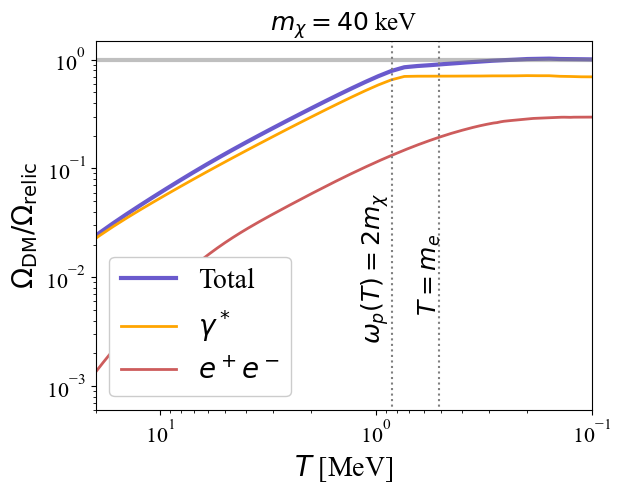

In [26]:
f, ax = plt.subplots()
#alist = np.logspace(-1.9, 1.5)
alist = np.logspace(-1.9, 1.12)
ax.loglog(T(alist), relic40/nxrelic(0.04, T(100))*alist**3/100**3,lw=3,c='SlateBlue')
ax.loglog(T(alist), relic_plas40/nxrelic(0.04, T(100))*alist**3/100**3,lw=2,c='Orange')

alist = np.logspace(-2.4, 1.12,num=200)
ax.loglog(T(alist), relic_ann40/nxrelic(0.04, T(100))*alist**3/100**3,lw=2,c='IndianRed')

ax.loglog(T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 40$ keV', fontsize=18)
ax.set_xlim([20,0.1])
ax.set_ylim([0.0006, 1.5])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(fsolve(lambda t: wp(t)-2 *0.04, 1), 1e-4,1e2, color='gray',linestyles=":")
ax.vlines(me, 1e-4,1e2,color='gray',linestyles=":")

ax.text(0.65, 0.005, r'$T = m_e$',rotation=90,fontsize=18)
ax.text(1.2, 0.003, r'$\omega_p(T) = 2 m_\chi$',rotation=90, fontsize=18)
#ax.text(16, 0.3, r'$m_\chi = 40$ keV',fontsize=20)

ax.legend(['Total', R'$\gamma^*$',r'$e^+ e^-$'],\
          framealpha=1, loc='lower left', fontsize=20)

plt.savefig("abundance_40_new.pdf",bbox_inches='tight')

In [27]:
relic400 =relic(1.87e-11, 0.4, whole_shebang=True)
relic_plas400=relic_plas(1.87e-11, 0.4, whole_shebang=True)
relic_ann400 = relic_ann(1.87e-11, 0.4, whole_shebang=True)

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[0.99731569]
[0.19281993]
[0.77374546]


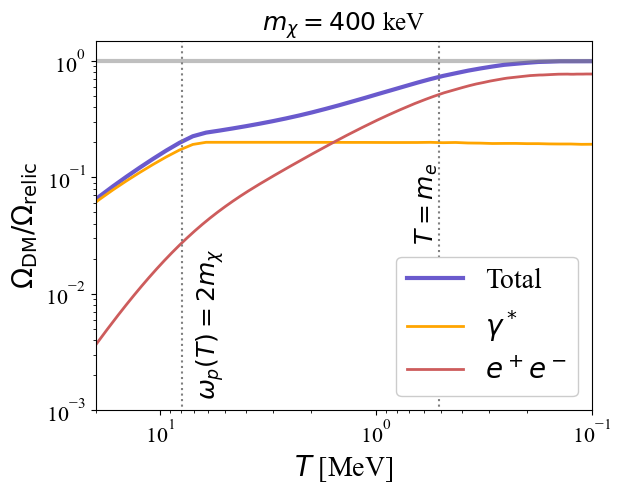

In [28]:
f, ax = plt.subplots()
#alist = np.logspace(-1.9, 1.5)
alist = np.logspace(-1.9, 1.12)
ax.loglog(T(alist), relic400/nxrelic(0.4, T(100))*alist**3/100**3,lw=3,c='SlateBlue')

ax.loglog(T(alist), relic_plas400/nxrelic(0.4, T(100))*alist**3/100**3,lw=2,c='Orange')

alist = np.logspace(-2.4, 1.12,num=200)
ax.loglog(T(alist), relic_ann400/nxrelic(0.4, T(100))*alist**3/100**3,lw=2,c='IndianRed')

alist = np.logspace(-1.9, 1.12)
ax.loglog(T(alist), np.ones_like(alist), lw=3, c='gray', alpha=0.5)

ax.set_ylabel(r'$\Omega_\mathrm{DM}/\Omega_\mathrm{relic}$', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
ax.set_title(r'$m_\chi= 400$ keV', fontsize=18)
ax.set_xlim([20,0.1])
ax.set_ylim([0.001, 1.5])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.vlines(fsolve(lambda t: wp(t)-2 *0.4, 1), 1e-4,1e2, color='gray',linestyles=":")
ax.vlines(me, 1e-4,1e2,color='gray',linestyles=":")

ax.text(7, 0.0015, r'$\omega_p(T) = 2 m_\chi$',rotation=90,fontsize=18)
ax.text(0.67, 0.03, r'$T = m_e$',rotation=90,fontsize=18)

ax.legend(['Total', R'$\gamma^*$', r'$e^+ e^-$'],\
          framealpha=1,fontsize=20)

plt.savefig("abundance_400_new.pdf",bbox_inches='tight')

In [29]:
m_production = np.logspace(-3, 0)
Q_production_nomu=[  9.36431037e-11,   8.75851343e-11,   8.20430909e-11,
         7.68946804e-11,   7.20247231e-11,   6.81605003e-11,
         6.41616007e-11,   6.11040555e-11,   5.74944927e-11,
         5.48654911e-11,   5.19668008e-11,   4.95793383e-11,
         4.73794625e-11,   4.57432551e-11,   4.34744453e-11,
         4.16537510e-11,   4.01249889e-11,   3.86509476e-11,
         3.72133087e-11,   3.59145588e-11,   3.49409810e-11,
         3.38245198e-11,   3.29930543e-11,   3.22923893e-11,
         3.16328930e-11,   3.07377148e-11,   3.00498394e-11,
         2.95302655e-11,   2.87779923e-11,   2.82751424e-11,
         2.74036970e-11,   2.68122732e-11,   2.62415854e-11,
         2.55004549e-11,   2.48448505e-11,   2.42319732e-11,
         2.34654551e-11,   2.26272377e-11,   2.19081482e-11,
         2.11100833e-11,   2.03274966e-11,   1.94843612e-11,
         1.87049460e-11,   1.79964084e-11,   1.74194233e-11,
         1.73340126e-11,   1.75973880e-11,   1.79181484e-11,
         1.81699607e-11,   1.85652785e-11];

In [30]:
Q_production = []
for i in range(len(m_production)):
    gulu = relic(Q_production_nomu[i], m_production[i])
    newQ = np.sqrt(1/gulu)*Q_production_nomu[i]
    Q_production = np.append(Q_production, newQ)
    #print("the relic abundance is "+str(gulu)+" for m = "+str(mlist[i]))
    #print("I would recommend a new Q of "+str(newQ))
    print('----------------------------')
    print("for m = "+str(m_production[i])+" Q should be "+str(newQ))

/Users/ellailes/anaconda3/envs/power-spectra/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_27407/3132527472.py:43: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


----------------------------
for m = 0.001 Q should be [1.23178696e-10]
----------------------------
for m = 0.0011513953993264468 Q should be [1.1582111e-10]
----------------------------
for m = 0.0013257113655901094 Q should be [1.08235404e-10]
----------------------------
for m = 0.0015264179671752333 Q should be [1.01602057e-10]
----------------------------
for m = 0.0017575106248547913 Q should be [9.65093871e-11]
----------------------------
for m = 0.0020235896477251575 Q should be [9.05908364e-11]
----------------------------
for m = 0.002329951810515372 Q should be [8.44611788e-11]
----------------------------
for m = 0.0026826957952797246 Q should be [8.09497909e-11]
----------------------------
for m = 0.0030888435964774815 Q should be [7.56827148e-11]
----------------------------
for m = 0.0035564803062231283 Q should be [7.24074474e-11]
----------------------------
for m = 0.004094915062380427 Q should be [6.86058311e-11]
----------------------------
for m = 0.004714866363

In [ ]:
for i in range(len(m_production)):
    gulu = relic(Q_production[i], m_production[i])
    #newQ = np.sqrt(1/gulu)*Q_production_nomu[i]
    #Q_production = append(Q_production, newQ)
    print("the relic abundance is "+str(gulu)+" for m = "+str(m_production[i]))
    #print("I would recommend a new Q of "+str(newQ))
    print('----------------------------')
    #print("for m = "+str(m_production[i])+" Q should be "+str(newQ))

/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_50729/3132527472.py:43: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


the relic abundance is [0.99543427] for m = 0.001
----------------------------
the relic abundance is [0.99641234] for m = 0.0011513953993264468
----------------------------
the relic abundance is [0.99340698] for m = 0.0013257113655901094
----------------------------
the relic abundance is [0.99803839] for m = 0.0015264179671752333
----------------------------
the relic abundance is [1.00496397] for m = 0.0017575106248547913
----------------------------
the relic abundance is [1.01652204] for m = 0.0020235896477251575
----------------------------
the relic abundance is [0.99938797] for m = 0.002329951810515372
----------------------------
the relic abundance is [0.99210903] for m = 0.0026826957952797246
----------------------------
the relic abundance is [1.01061104] for m = 0.0030888435964774815
----------------------------
the relic abundance is [1.02603511] for m = 0.0035564803062231283
----------------------------
the relic abundance is [1.01908993] for m = 0.004094915062380427
--

In [ ]:
def plotfiles(ax ,filename, a=1,directory='/Users/kschutz/Dropbox/Research/freeze-in/',color='k', opaque=True, projection=True, DD=True, freeze=False, edges=False, corrected=False, relic=False, existing=False, stars=False, eV=False):
    #sys.path.append(directory)
    f= open(directory+filename+'.txt', 'r')
    data =f.read()
    data = data.split()
    m = [float(data[2*i]) for i in range(int(len(data)/2.))]
    Q = [float(data[2*i+1]) for i in range(int(len(data)/2.))]
    
    if relic:
        ax.loglog(m[::-1], Q[::-1], c=color, lw=3)
        
    if eV:
        m = [i*1e-6 for i in m]

    if DD:
        #
        mu = [me*i/(me+i) for i in m]
        Q = [np.sqrt((Q[i]*(alpha_em*me)**4*(4 *np.pi)**2*cm2_conv)/ (16*np.pi*e**4 *mu[i]**2))\
            for i in range(len(m))]
        #print(Q)
    if freeze:
        if corrected:
            Q = [np.sqrt(i/(3*4*e**4)) for i in Q]
            #print(m)
            #print(Q)
        else:
            Q = [np.sqrt(i/(4*e**4)) for i in Q]
        ax.loglog(m, Q, c=color, lw=4)
        
    if stars:
        Q = [sigma_e(m[i], Q[i]) for i in range(len(Q))]
        
    if edges:
        ax.loglog(m, Q, c=color, lw=4, alpha=a)
    
    if projection:
        ax.loglog(m, Q, c=color, ls=':') 
        
    elif existing:
        ax.loglog(m, Q, c=color)
        
    else:
        if opaque:
            ax.fill(m ,Q, c='w', alpha=1)
        ax.fill(m ,Q, c=color, alpha=a, lw=0)
        
        
import matplotlib.patheffects as path_effects

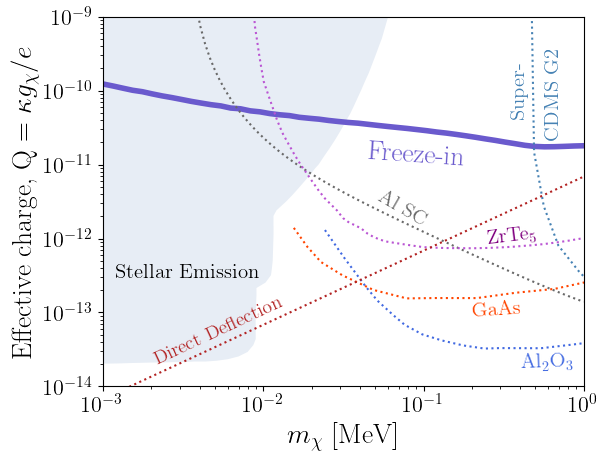

In [ ]:
f, ax = plt.subplots()
f.set_size_inches(6.2, 4.8)

#ax.loglog(m_production, Q_production_nomu,c='slateblue',lw=4)
ax.loglog(m_production, Q_production,c='slateblue',lw=4)#, ls=":")
#ax.loglog(m_production, Q_ann_production,c='slateblue',lw=4)
ax.set_xlim([1e-3, 1])
ax.set_ylim([1e-14, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)

plotfiles(ax, 'stars', projection=False, DD=False,color='LightSteelBlue',a=0.3)
#plotfiles(ax, 'stars_conservative', projection=False, DD=False,color='LightSteelBlue',a=0.3)
ax.text(1.2e-3, 3e-13, r'Stellar Emission', rotation=0, color='k', fontsize=15)

#plotfiles(ax, 'AlSC', color='dimgray')
plotfiles(ax, 'Alnew', color='dimgray', eV=True)
ax.text(0.5e-1, 1.5e-12, 'Al SC', rotation=-30, color='dimgray',fontsize=15)

plotfiles(ax, 'GaAs', color='orangered')
ax.text(2e-1, 0.9e-13, 'GaAs', rotation=4, color='orangered', fontsize=15)

#plotfiles(ax, 'ZrTe5', color='mediumorchid')
#ax.text(4e-1, 0.98e-13, r'ZrTe$_5$', rotation=7, color='purple', fontsize=15)

plotfiles(ax, 'ZrTe5new', color='mediumorchid')
ax.text(2.5e-1, 0.85e-12, r'ZrTe$_5$', rotation=7, color='purple', fontsize=15)

plotfiles(ax, 'sapphire', color='royalblue')
ax.text(4e-1, 0.18e-13, r'Al$_2$O$_3$', rotation=2, color='royalblue',fontsize=15)

#plotfiles(ax, 'DMradio', color='royalblue')
#ax.text(4e-1, 0.4e-13, r'Al$_2$O$_3$', rotation=2, color='royalblue',fontsize=15)


plotfiles(ax, 'CDMS', color='steelblue')
ax.text(3.5e-1, 0.6e-10, r'Super- \\\\$\,\,$CDMS G2', rotation=90, color='steelblue', fontsize=15)

#ax.text(4.5e-2, 1.3e-11, r'Freeze-in', rotation=-4, fontsize=20,color='slateblue')

ax.text(4.5e-2, 1e-11, r'Freeze-in', rotation=-4, fontsize=20,color='slateblue')

#ax.text(4.5e-2, 2.5e-11, r'Freeze-in', rotation=-11, fontsize=20,color='slateblue')

#ax.text(1.97e-3, 4e-10, r'Freeze-in (no plasmons)', rotation=-12,color='IndianRed')

#,path_effects=[matplotlib.path_effects.withStroke(foreground='slateblue', alpha=1,linewidth=0.4)])

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.loglog([1e-2, 3e-2, 1e-1], [1.88e-11, 5.86e-11, 2.05e-10])

lya_index=24
planck_index=27
s4_index = 32
gs_index=38

m=m_production
Q=Q_production_nomu

#ax.loglog(m[0:lya_index], Q[0:lya_index], c='lavender', lw=4, alpha=0.8)


#ax.loglog(m[planck_index:gs_index+1], Q[planck_index:gs_index+1], c='lavender', lw=4, alpha=1, ls=':')

#ax.loglog(1.8e-2, 3.5e-11, 'o')
#ax.loglog(3.1e-2, 3.1e-11, 'o', c='y')
ax.set_xlim([1e-3, 1])
ax.set_ylim([1e-14, 1e-9])

#ax.loglog(m[lya_index], Q[lya_index], 'o', c='black', lw=4)
#ax.loglog(m[planck_index], Q[planck_index], 'o', c='black', lw=4)
#ax.loglog(m[s4_index], Q[s4_index], 'o', c='black', lw=4)
#ax.loglog(m[gs_index], Q[gs_index], 'o', c='black', lw=4)

#ax.text(1.8e-2, 5e-11, r'Ly-$\alpha$')
#ax.text(3.5e-2, 4e-11, r'Planck')
#ax.text(0.88e-1, 3.5e-11, r'S4')
#ax.text(2.2e-1, 3e-11, r'21 cm')

#plotfiles(ax, '21cm', edges=True, color='goldenrod')
#ax.text(1.3e-3, 2e-11, r'EDGES', rotation=23, color='goldenrod',fontsize=18,path_effects=[path_effects.withStroke(foreground='darkgoldenrod', alpha=1,linewidth=0.4)])

#ax.loglog([0.00000201,3.09e1],[1.35e-15,2.17e-8], ls=":",c='mediumseagreen')
#ax.text(1.1e-3,1e-12,'DM Radio (modified)',c='mediumseagreen',rotation=25,fontsize=13)


ax.loglog([0.0000014173039413183743,65.17988610504468],[9.479814631043565e-18,4.531845994528267e-10], ls=":",c='firebrick')
ax.text(2e-3,2e-14,'Direct Deflection',c='firebrick',rotation=25)
#ax.legend(['$\gamma^*$ and $e^+e^-$','$e^+e^-$ Only'],framealpha=1,loc='center left')


plt.savefig("Q_talk_update_new.pdf",bbox_inches='tight')

In [ ]:
#Qinterp = interp1d(mlist, Qrecommend)
Q_ann_production = []
for i in range(len(m_production)):
    gulu = relic_ann(Q_production_nomu[i], m_production[i])
    newQ = np.sqrt(1/gulu)*Q_production_nomu[i]
    Q_ann_production = append(Q_ann_production, newQ)
    print("the relic abundance is "+str(gulu)+" for m = "+str(m_production[i]))
    print("I would recommend a new Q of "+str(newQ))

the relic abundance is [0.05039702] for m = 0.001
I would recommend a new Q of [4.17131858e-10]
the relic abundance is [0.0508241] for m = 0.0011513953993264468
I would recommend a new Q of [3.88504062e-10]
the relic abundance is [0.05104099] for m = 0.0013257113655901094
I would recommend a new Q of [3.63147005e-10]
the relic abundance is [0.0515925] for m = 0.0015264179671752333
I would recommend a new Q of [3.38534558e-10]
the relic abundance is [0.05248687] for m = 0.0017575106248547913
I would recommend a new Q of [3.14380984e-10]
the relic abundance is [0.05400584] for m = 0.0020235896477251575
I would recommend a new Q of [2.93300237e-10]
the relic abundance is [0.05486219] for m = 0.002329951810515372
I would recommend a new Q of [2.73929392e-10]
the relic abundance is [0.0573144] for m = 0.0026826957952797246
I would recommend a new Q of [2.55233778e-10]
the relic abundance is [0.05852902] for m = 0.0030888435964774815
I would recommend a new Q of [2.37651534e-10]
the relic ab

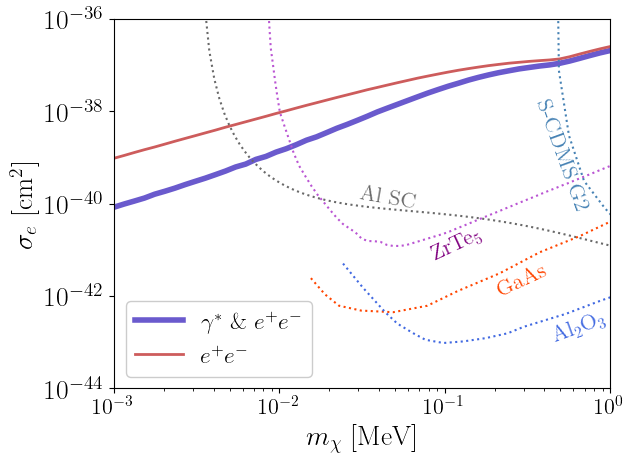

In [ ]:
def sigma_e(m, Q):
    mu = m*me/(m+me*np.ones_like(m))
    #print(mu)
    return 16*np.pi * mu**2 *Q**2*e**4/(cm2_conv*(4*np.pi)**2 *(alpha_em*me)**4)

f, ax = plt.subplots()
#ax.loglog(m_production, sigma_e(m_production,np.array(Q_production_nomu)),c='slateblue',lw=4)
ax.loglog(m_production, sigma_e(m_production,np.array(Q_production)),c='slateblue',lw=4)#,ls=":")
ax.loglog(m_production, sigma_e(m_production,Q_ann_production),c='IndianRed',lw=2)
ax.set_xlim([1e-3, 1])
ax.set_ylim([1e-44, 1e-36])
ax.set_yticks(np.logspace(-44, -36, num=9))
ax.set_yticklabels(np.logspace(-44, -36, num=9),  fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
#ax.yaxis.set_tick_params(labelsize=16)
ax.set_ylabel(r'$\sigma_e$ [cm$^2$]', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)



#plotfiles(ax, 'stars', projection=False, DD=False, stars=True ,color='LightSteelBlue',a=0.3)
#ax.text(1.4e-3, 4e-43, r'Stellar Emission', rotation=0, color='k')

plotfiles(ax, 'Alnew', color='dimgray',DD=False,eV=True)
ax.text(0.3e-1, 0.8e-40, 'Al SC', rotation=-10, color='dimgray',fontsize=16)

plotfiles(ax, 'GaAs', color='orangered',DD=False)
ax.text(2e-1, 0.1e-41, 'GaAs', rotation=25, color='orangered',fontsize=16)

plotfiles(ax, 'ZrTe5new', color='mediumorchid',DD=False)
ax.text(0.8e-1, 0.6e-41, r'ZrTe$_5$', rotation=25, color='purple',fontsize=16)

plotfiles(ax, 'sapphire', color='royalblue',DD=False)
ax.text(4.3e-1, 0.1e-42, r'Al$_2$O$_3$', rotation=20, color='royalblue',fontsize=16)

plotfiles(ax, 'CDMS', color='steelblue',DD=False)
#ax.text(4e-1, 1e-38, r'Super- \\\\$\,\,$CDMS G2', rotation=90, color='steelblue')
ax.text(3.4e-1, 7e-41, r'S-CDMS G2', color='steelblue',rotation=-70, fontsize=16)


#ax.text(4.5e-2, 1.3e-11, r'Freeze-in', rotation=-4, fontsize=20,color='slateblue')#,path_effects=[matplotlib.path_effects.withStroke(foreground='slateblue', alpha=1,linewidth=0.4)])


ax.legend(['$\gamma^*$ \& $e^+e^-$','$e^+e^-$'],framealpha=1,\
          fontsize=17, loc="lower left")


plt.savefig("DD_comparison_new.pdf",bbox_inches='tight')

## phase space from annihilation

In [ ]:
def Phi_e_Msq_COM(mx, s, Q=1):
    return Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*me**2/s)\
        *(s**2 +1/3*(s-4*me**2)*(s-4*mx**2)+4*s*(mx**2+me**2))\
    
def Phi_mu_Msq_COM(mx, s, Q=1):
    return Q**2*e**4/(2*np.pi*s**2)*np.sqrt(1 - 4*mmu**2/s)\
        *(s**2 +1/3*(s-4*mmu**2)*(s-4*mx**2)+4*s*(mx**2+mmu**2))\

def coll_integrand(mx, px, T, s, q=1):
    #I have included a factor of E downstairs!
    Ex = np.sqrt(px**2+mx**2)
    #I'm having issues with overflow so I'm going to try to mitigate
    #the blowing up exponential by writing sinh in terms of
    # sinhx = (e^x - e^-x)/2
    #extra factor of 2 downstairs for the sinh!!!
    return Phi_e_Msq_COM(mx, s, Q=q)\
    *T/(2*2*px*Ex*(2*np.pi)**2)\
    *(np.exp(-Ex *s/(2*mx**2 *T)+px*np.sqrt(s*(s-4*mx**2))/(2*mx**2*T))\
    +np.exp(-Ex *s/(2*mx**2 *T)-px*np.sqrt(s*(s-4*mx**2))/(2*mx**2*T)))
    
def coll_integrand_mu(mx, px, T, s, q=1):
    #I have included a factor of E downstairs!
    Ex = np.sqrt(px**2+mx**2)
    #I'm having issues with overflow so I'm going to try to mitigate
    #the blowing up exponential by writing sinh in terms of
    # sinhx = (e^x - e^-x)/2
    #extra factor of 2 downstairs for the sinh!!!
    return Phi_mu_Msq_COM(mx, s, Q=q)\
    *T/(2*2*px*Ex*(2*np.pi)**2)\
    *(np.exp(-Ex *s/(2*mx**2 *T)+px*np.sqrt(s*(s-4*mx**2))/(2*mx**2*T))\
    +np.exp(-Ex *s/(2*mx**2 *T)-px*np.sqrt(s*(s-4*mx**2))/(2*mx**2*T)))
    

def coll_ann(mx, px, T, Q=1, muon=True):
    Ex = np.sqrt(px**2+mx**2)
    warm = integrate.quad(lambda s: coll_integrand(mx, px, T, s,q=Q), \
                    max(4*me**2, 2*mx*(Ex+mx)), np.inf)[0]# this old cutoff for s is wrong!(Ex+mx)**2), np.inf)[0]
    if muon==False:
        return warm
    
    else:
        hot = integrate.quad(lambda s: coll_integrand_mu(mx, px, T, s,q=Q), \
                    4*mmu**2, np.inf)[0]
        return warm+hot

    
def coll_ann_old_wrong(mx, px, T, Q=1, muon=True):
    Ex = np.sqrt(px**2+mx**2)
    warm = integrate.quad(lambda s: coll_integrand(mx, px, T, s,q=Q), \
                    max(4*me**2, (Ex+mx)**2), np.inf)[0]
    if muon==False:
        return warm
    
    else:
        hot = integrate.quad(lambda s: coll_integrand_mu(mx, px, T, s,q=Q), \
                    4*mmu**2, np.inf)[0]
        return warm+hot


def f_ann(mx, px, q=1, ai=a(30), af=10, muon=True):
    integrand = lambda a: coll_ann(mx, px*af/a, T(a), Q=q, muon=muon)/(a*H(a))
    gulu= integrate.quad(integrand, ai, af)[0]
    #print(gulu)
    return gulu

def f_ann_wrong(mx, px, q=1, ai=a(30), af=10):
    integrand = lambda a: coll_ann(mx, px*af/a, T(a), Q=q)/(a*H(a))\
    *np.sqrt(px**2*af**2/a**2+mx**2)/np.sqrt(px**2+mx**2)
    gulu= integrate.quad(integrand, ai, af)[0]
    #print(gulu)
    return gulu

def f_ann_wrong(mx, px, q=1, ai=a(30), af=10):
    integrand = lambda a: coll_ann(mx, px*af/a, T(a), Q=q)/(a*H(a))\
    *np.sqrt(px**2*af**2/a**2+mx**2)/np.sqrt(px**2+mx**2)
    gulu= integrate.quad(integrand, ai, af)[0]
    #print(gulu)
    return gulu

## Phase space from plasmons

In [ ]:
def coll_trans_integrand(mx, px, T, k, Q=1):
    m = m_t(T, k)
    w = np.sqrt(m**2+k**2)
    Ex = np.sqrt(px**2+mx**2)
    if abs((2*Ex*w-m**2)/(2*k*px))>1:
        return 0
    else:
        return Q**2*e**2/(2*px*np.pi*Ex)*k*Z_t(T, k)\
        /(w*(np.exp(w/T)-1)) *(-2*px**2+m**2\
        +(2*Ex*w-m**2)**2/(2*k**2))
    
def coll_trans_integrand_old(mx, px, T, k, Q=1):
    m = m_t(T, k)
    w = np.sqrt(m**2+k**2)
    Ex = np.sqrt(px**2+mx**2)
    if abs((2*Ex*w-m**2)/(2*k*px))>1:
        return 0
    else:
        return Q**2*e**2/(2*px*np.pi*Ex)*k*Z_t(T, k)\
        /(w*(np.exp(w/T)-1)) *(+2*px**2+m**2\
        -(2*Ex*w-m**2)**2/(2*k**2))
        
def coll_long_integrand(mx, px, T, k, Q=1):
    w = omega_ell(T,k)
    m=np.sqrt(w**2-k**2)
    Ex = np.sqrt(px**2+mx**2)
    if abs((2*Ex*w-m**2)/(2*k*px))>1:
        return 0
    else:
        return Q**2*e**2/(2*px*np.pi*Ex)*w*Z_ell(T, k)\
        /(k*(np.exp(w/T)-1)) *(2*Ex*(w-Ex)-m**2/2)
        
def coll_trans(mx, px, T, q=1):
    return integrate.quad(lambda k: coll_trans_integrand\
                (mx, px, T,k,Q=q), 0, np.inf)[0]

def coll_trans_old(mx, px, T, q=1):
    return integrate.quad(lambda k: coll_trans_integrand_old\
                (mx, px, T,k,Q=q), 0, np.inf)[0]

def coll_long(mx, px, T, q=1):
    return integrate.quad(lambda k: coll_long_integrand\
                (mx, px, T,k,Q=q), 0, kmax(T))[0]

def f_plas_integrand(mx, px, Q=1,ai=a(30), af=10,N=50):
    alist = np.logspace(np.log10(ai), np.log10(af), num=N)
    #print(alist)
    integrand= [(coll_trans(mx, px*af/i, T(i), q=Q)\
        +coll_long(mx, px*af/i, T(i), q=Q))/(i*H(i)) for i in alist]
    return interp1d(alist, integrand)

def f_plas(mx, px, Q=1, ai=a(30), af=10,N=50):
    gulu= integrate.quad(f_plas_integrand(mx,px,Q=Q,ai=ai, af=af,N=N), ai, af)[0]
    return gulu

def f_plas_integrand_old(mx, px, Q=1,ai=a(30), af=10,N=50):
    alist = np.logspace(np.log10(ai), np.log10(af), num=N)
    #print(alist)
    integrand= [(coll_trans_old(mx, px*af/i, T(i), q=Q)\
        +coll_long(mx, px*af/i, T(i), q=Q))/(i*H(i)) for i in alist]
    return interp1d(alist, integrand)

def f_plas_old(mx, px, Q=1, ai=a(30), af=10,N=50):
    gulu= integrate.quad(f_plas_integrand_old(mx,px,Q=Q,ai=ai, af=af,N=N), ai, af)[0]
    return gulu

In [ ]:
#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))
plist = np.concatenate((np.linspace(0.01, 0.3, num=50),np.linspace(0.31,5,num=50)))
earlier40_plas = [f_plas(0.04, i/0.3,af=0.3,N=10) for i in plist]
print('-')
early40_plas = [f_plas(0.04, i/1,af=1,N=15) for i in plist]
print('--')
medium40_plas = [f_plas(0.04, i/3,af=3,N=20) for i in plist]
print('---')
lateish40_plas = [f_plas(0.04, i/5,af=5,N=25) for i in plist]

<ipython-input-67-8f06633da31e>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda k: coll_trans_integrand\
<ipython-input-67-8f06633da31e>:53: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  gulu= integrate.quad(f_plas_integrand(mx,px,Q=Q,ai=ai, af=af,N=N), ai, af)[0]
/Users/kschutz/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  impr

-
--
---


In [ ]:
plist = np.concatenate((np.linspace(0.01, 0.3, num=30),np.linspace(0.31,10,num=100)))
late400_plas = [f_plas(0.4, i/10,af=10,N=30) for i in plist]
late400 = [f_ann(0.4, i/10,af=10) for i in plist]

<ipython-input-67-8f06633da31e>:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda k: coll_long_integrand\
<ipython-input-67-8f06633da31e>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a sp

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5')]

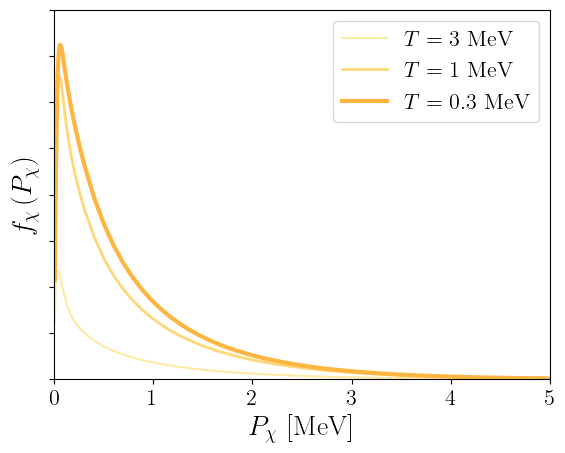

In [ ]:
f, ax=plt.subplots()

cmap = matplotlib.cm.get_cmap('YlOrBr')

early_color =  cmap(0.2)
mid_color = cmap(0.3)
late_color =cmap(0.42)

#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))
plist = np.concatenate((np.linspace(0.01, 0.3, num=50),np.linspace(0.31,5,num=50)))
ax.plot(plist, earlier40_plas*plist**2,c=early_color)#c='orange',alpha=0.5)
ax.plot(plist, early40_plas*plist**2,c=mid_color,lw=2)#'orange',alpha=0.9,lw=2)
ax.plot(plist, medium40_plas*plist**2,c=late_color,lw=3)#'darkorange',alpha=1,lw=3)
#ax.plot(plist, lateish40_plas*plist**2)
#ax.plot(plist, late40_plas*plist**2)

ax.set_xlim([0,5])
ax.set_ylim([0,0.8e18])
ax.set_yticklabels([])

#ax.set_xlabel(r'$p \times a$ [MeV$\, \times a$]')
#ax.set_ylabel(r'$f(p \times a)$ [Normalized to $\Omega_\chi$]')

ax.legend(['$T= 3$ MeV','$T= 1$ MeV','$T= 0.3$ MeV'],fontsize=16)

ax.set_xlabel(r'$P_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$f_\chi\left(P_\chi \right)$', fontsize=20)


#ax.xaxis.set_tick_params(labelsize=16)
#ax.yaxis.set_tick_params(labelsize=16)
ax.set_xticks(range(6))
ax.set_xticklabels(range(6), fontsize=16)

In [ ]:
plist = np.linspace(0.01,10,num=100)
earlier40 = [f_ann(0.04, i/0.3,af=0.3) for i in plist]
early40 = [f_ann(0.04, i/1,af=1) for i in plist]
medium40 = [f_ann(0.04, i/3,af=3) for i in plist]
lateish40 = [f_ann(0.04, i/5,af=5) for i in plist]
late40 = [f_ann(0.04, i/10,af=10) for i in plist]
#later10 = [f_ann(0.01, i/30,af=30) for i in plist]

<ipython-input-61-501e9281fadf>:62: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  gulu= integrate.quad(integrand, ai, af)[0]
<ipython-input-61-501e9281fadf>:62: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  gulu= integrate.quad(integrand, ai, af)[0]
<ipython-input-61-501e9281fadf>:36: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warm = integrate.quad(lambda s: coll_integrand(mx, px, T, s,q=Q), \


In [ ]:
def psq_rel_ferm(T):
    return integrate.quad(lambda p: 1/(np.exp(p/T)+1)*p**4, 0, np.inf)[0]/\
    integrate.quad(lambda p: 1/(np.exp(p/T)+1)*p**2, 0, np.inf)[0]

def p_rel_ferm(T):
    return integrate.quad(lambda p: 1/(np.exp(p/T)+1)*p**3, 0, np.inf)[0]/\
    integrate.quad(lambda p: 1/(np.exp(p/T)+1)*p**2, 0, np.inf)[0]

def psq_NR_DM(T,m):
    return integrate.quad(lambda p: np.exp(-p**2/(2*m*T))*p**4, 0, np.inf)[0]/\
    integrate.quad(lambda p: np.exp(-p**2/(2*m*T))*p**2, 0, np.inf)[0]

In [ ]:
#plist = list(np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30))))+[10]
#plist = list(np.concatenate((np.linspace(0.01, 0.3, num=50),np.linspace(0.31,5,num=50))))+[10]
#plas40 = interp1d(plist, late40_plas+[0])
#plas40 = interp1d(plist, medium40_plas+[0], kind='cubic')
plist = list(np.linspace(0.01,10,num=100))
ann40 = interp1d(plist, list(late40))

#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))
plist = np.concatenate((np.linspace(0.01, 0.3, num=50),np.linspace(0.31,5,num=50)))
interp40 = interp1d(plist,(medium40_plas+ann40(plist))*plist**2)
#plist = np.concatenate((np.linspace(0.01, 0.3, num=30),np.linspace(0.31,10,num=100)))


plist = np.concatenate((np.linspace(0.01, 0.3, num=30),np.linspace(0.31,10,num=100)))
interp400 = interp1d(plist,(np.array(late400_plas)+np.array(late400))*plist**2)


qsq40 = integrate.quad(lambda p: interp40(p)*p**2,0.01,5)[0]/integrate.quad(lambda p: interp40(p),0.01,5)[0]
q40 = integrate.quad(lambda p: interp40(p)*p,0.01,5)[0]/integrate.quad(lambda p: interp40(p),0.01,5)[0]
qsq400 = integrate.quad(lambda p: interp400(p)*p**2,0.01,10)[0]/integrate.quad(lambda p: interp400(p),0.01,10)[0]
q400 = integrate.quad(lambda p: interp400(p)*p,0.01,10)[0]/integrate.quad(lambda p: interp400(p),0.01,10)[0]
norm40 = integrate.quad(lambda p: interp40(p),0.01,5)[0]
norm400 = integrate.quad(lambda p: interp400(p),0.01,10)[0]


T_rel_40 = fsolve(lambda T: p_rel_ferm(T)-q40,1)
norm_rel_40 = norm40/integrate.quad(lambda p: 1/(np.exp(p/T_rel_40)+1)*p**2,0,np.inf)[0]
T_rel_400 = fsolve(lambda T: p_rel_ferm(T)-q400,1)
norm_rel_400 = norm400/integrate.quad(lambda p: 1/(np.exp(p/T_rel_400)+1)*p**2,0,np.inf)[0]

T_NR_40= fsolve(lambda T: psq_NR_DM(T,0.04)-qsq40,1)
norm_NR_40 = norm40/integrate.quad(lambda p: np.exp(-p**2/(2*0.04*T_NR_40))*p**2,0,np.inf)[0]
T_NR_400 = fsolve(lambda T: psq_NR_DM(T,0.4)-qsq400,1)
norm_NR_400 = norm400/integrate.quad(lambda p: np.exp(-p**2/(2*0.4*T_NR_400))*p**2,0,np.inf)[0]

<ipython-input-147-e63795af100a>:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  qsq40 = integrate.quad(lambda p: interp40(p)*p**2,0.01,5)[0]/integrate.quad(lambda p: interp40(p),0.01,5)[0]
<ipython-input-147-e63795af100a>:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and

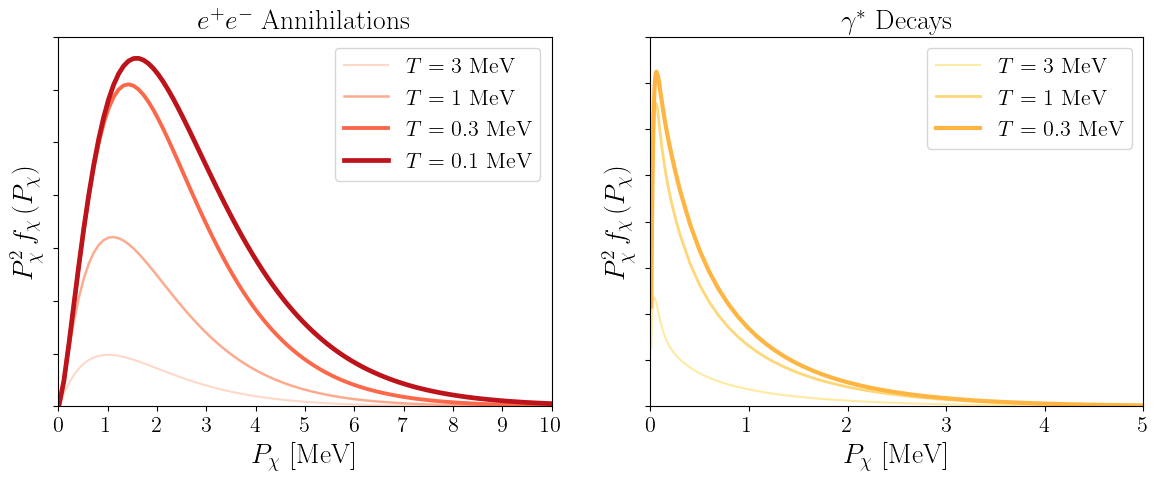

In [ ]:
f, axs=plt.subplots(1,2)

ax=axs[0]
cmap = matplotlib.cm.get_cmap('Reds')

early_color =  cmap(0.15)
mid_color = cmap(0.3)
late_color =cmap(0.5)
later_color = cmap(0.8)

plist = np.linspace(0.01,10,num=100)
ax.plot(plist, earlier40*plist**2, c=early_color)#'lightcoral',alpha=0.5)
ax.plot(plist, early40*plist**2, c=mid_color,lw=1.8)#c='lightcoral',alpha=0.8,lw=1.7)
ax.plot(plist, medium40*plist**2, c=late_color, lw=2.8)#'indianred',alpha=0.8,lw=2.4)
#ax.plot(plist, lateish40*plist**2, c='indianred',alpha=1,lw=2.5)
ax.plot(plist, late40*plist**2, c=later_color, lw=3.4)#c='firebrick',alpha=1,lw=3.)

ax.set_xlim([0,10])
#ax.set_ylim([0,6e16])
ax.set_ylim([0,7e16])

ax.set_yticklabels([])

#ax.set_xlabel(r'$p \times a$ [MeV$\,\times a$]')
#ax.set_ylabel(r'$f(p\times a)$ [Normalized to $\Omega_\chi$]')
ax.set_xlabel(r'$P_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$P_\chi^2 \,f_\chi\left(P_\chi \right)$', fontsize=20)

ax.legend(['$T= 3$ MeV','$T= 1$ MeV','$T= 0.3$ MeV','$T= 0.1$ MeV','$T= 0.1$ MeV'],\
         fontsize=16)

#ax.xaxis.set_tick_params(labelsize=16)
#ax.yaxis.set_tick_params(labelsize=16)
ax.set_xticks(range(11))
ax.set_xticklabels(range(11), fontsize=16)

ax.set_title(r'$e^+ e^-$ Annihilations',fontsize=20)

ax=axs[1]
cmap = matplotlib.cm.get_cmap('YlOrBr')

early_color =  cmap(0.2)
mid_color = cmap(0.3)
late_color =cmap(0.42)

#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))
plist = np.concatenate((np.linspace(0.01, 0.3, num=50),np.linspace(0.31,5,num=50)))
ax.plot(plist, earlier40_plas*plist**2,c=early_color)#c='orange',alpha=0.5)
ax.plot(plist, early40_plas*plist**2,c=mid_color,lw=2)#'orange',alpha=0.9,lw=2)
ax.plot(plist, medium40_plas*plist**2,c=late_color,lw=3)#'darkorange',alpha=1,lw=3)
#ax.plot(plist, lateish40_plas*plist**2)
#ax.plot(plist, late40_plas*plist**2)

ax.set_xlim([0,5])
ax.set_ylim([0,0.8e18])
ax.set_yticklabels([])

#ax.set_xlabel(r'$p \times a$ [MeV$\, \times a$]')
#ax.set_ylabel(r'$f(p \times a)$ [Normalized to $\Omega_\chi$]')

ax.legend(['$T= 3$ MeV','$T= 1$ MeV','$T= 0.3$ MeV'],fontsize=16)

ax.set_xlabel(r'$P_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$P_\chi^2\, f_\chi\left(P_\chi \right)$', fontsize=20)


#ax.xaxis.set_tick_params(labelsize=16)
#ax.yaxis.set_tick_params(labelsize=16)
ax.set_xticks(range(6))
ax.set_xticklabels(range(6), fontsize=16)
ax.set_title(r'$\gamma^*$ Decays',fontsize=20)

f.set_size_inches(14, 4.8)

plt.savefig("freezein_temp_new_new.pdf",bbox_inches='tight')

In [ ]:
len(medium40_plas)

100

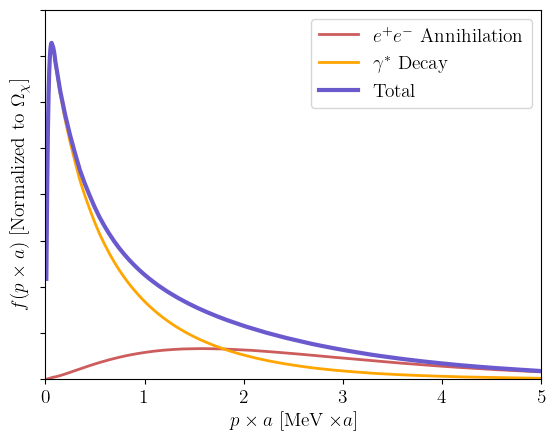

In [ ]:
f, ax=plt.subplots()
plist = np.concatenate((np.linspace(0.01, 0.1, num=200),np.linspace(0.1,5,num=100)))


#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,10,num=100)))
ax.plot(plist, ann40(plist)*plist**2,c='IndianRed',lw=2)
#ax.plot(plist, late40_plas*plist**2,c='orange',lw=2)
#ax.plot(plist, (late40_plas+ann40(plist))*plist**2,c='slateblue',lw=3)
ax.plot(plist, plas40(plist)*plist**2,c='orange',lw=2)
ax.plot(plist, (plas40(plist)+ann40(plist))*plist**2,c='slateblue',lw=3)
ax.set_xlim([0,5])
ax.set_ylim([0,0.8e18])
ax.set_yticklabels([])

ax.set_xlabel(r'$p \times a$ [MeV$\,\times a$]')
ax.set_ylabel(r'$f(p\times a)$ [Normalized to $\Omega_\chi$]')

ax.legend(['$e^+e^-$ Annihilation','$\gamma^*$ Decay','Total'])

In [ ]:
mlist_T = np.logspace(-3,0, num=30)
plas_list = []
ann_list = []
for j in mlist_T:#mlist_T[19:]:
    plist = np.concatenate((np.linspace(0.01, 0.3, num=30),np.linspace(0.31,10,num=100)))
    plas = [f_plas(j, i/10,ai=10**-1.9,af=10,N=30) for i in plist]
    np.save(str(round(j*1000))+'_plas_earlier', np.column_stack((plist, np.array(plas))))
    plas_list = append(plas_list, plas)
    ann = [f_ann(j, i/10,af=10) for i in plist]
    np.save(str(round(j*1000.))+'_ann_new',np.column_stack((plist, np.array(ann))))
    ann_list = append(ann_list, ann)
    print(j)

<ipython-input-67-8f06633da31e>:9: RuntimeWarning: overflow encountered in exp
  /(w*(np.exp(w/T)-1)) *(-2*px**2+m**2\
/Users/kschutz/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-67-8f06633da31e>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda k: coll_trans_integrand\
<ipython-input-67-8f06633da31e>:53: IntegrationWarning: The maximum number of subdivisio

0.001
0.0012689610031679222
0.0016102620275609393
0.0020433597178569417
0.002592943797404667
0.0032903445623126675
0.0041753189365604
0.005298316906283708
0.006723357536499335
0.008531678524172805
0.010826367338740546
0.01373823795883263
0.017433288221999882
0.022122162910704492
0.02807216203941177
0.035622478902624426
0.04520353656360243
0.057361525104486784
0.0727895384398315
0.09236708571873861


<ipython-input-67-8f06633da31e>:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda k: coll_long_integrand\


0.11721022975334805
0.14873521072935117
0.18873918221350977
0.2395026619987486
0.3039195382313198
0.38566204211634725
0.4893900918477494
0.6210169418915616
0.7880462815669912
1.0


In [ ]:
def psq_photons(T):
    #dist = lambda p: 1/(np.exp(p/T)-1)
    return integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**4, 0, np.inf)[0]/\
    integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**2, 0, np.inf)[0]
    
def p_photons(T):
    return integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**3, 0, np.inf)[0]/\
    integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**2, 0, np.inf)[0]

def Teff(qsq,m):
    return qsq/(3*m)

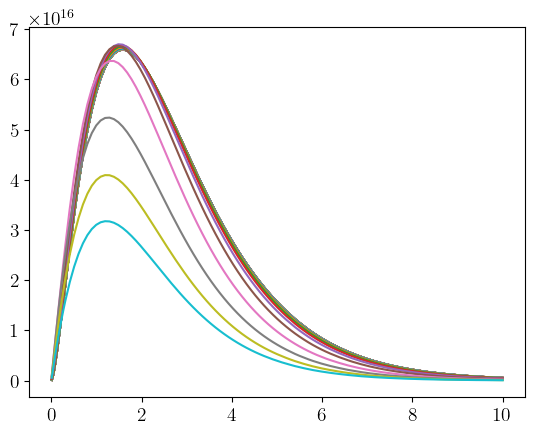

In [ ]:
f, ax = plt.subplots()
for i in range(30):
    gulu = np.load(str(round(mlist_T[i]*1000))+'_plas_earlier.npy')
    #ax.plot(gulu.T[0], gulu.T[0]**2*gulu.T[1])
    gulu = np.load(str(round(mlist_T[i]*1000))+'_ann_new.npy')
    ax.plot(gulu.T[0], gulu.T[0]**2*gulu.T[1])

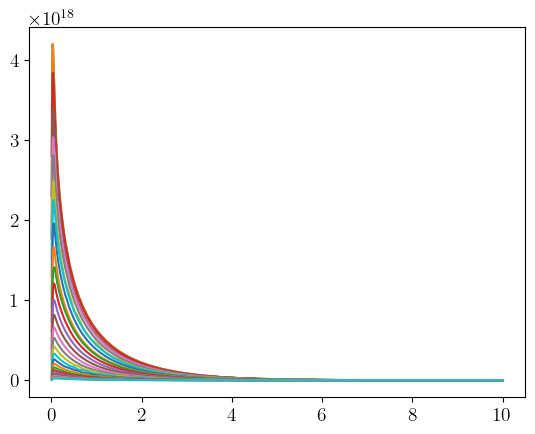

In [ ]:
f, ax = plt.subplots()
for i in range(30):
    gulu = np.load(str(round(mlist_T[i]*1000))+'_plas_earlier.npy')
    ax.plot(gulu.T[0], gulu.T[0]**2*gulu.T[1])
    gulu = np.load(str(round(mlist_T[i]*1000))+'_ann_new.npy')
    #ax.plot(gulu.T[0], gulu.T[0]**2*gulu.T[1])

In [ ]:
mlist_T = np.logspace(-3,0, num=30)
interp_list=[]
qsq_list = []
q_list = []
normlist=[]
for i in range(30):
    #if i>18:
    gulu_plas = np.load(str(round(mlist_T[i]*1000))+'_plas_earlier.npy')
    #else:
    #    gulu_plas = np.load(str(round(mlist_T[i]*1000))+'_plas.npy')
    #ax.semilogx(gulu.T[0], gulu.T[0]**2*gulu.T[1])
    gulu_ann = np.load(str(round(mlist_T[i]*1000))+'_ann_new.npy')
    gulu_interp = interp1d(gulu_plas.T[0],gulu_plas.T[0]**2*(gulu_ann.T[1]+gulu_plas.T[1]))
    plist = gulu_plas.T[0]
    interp_list = append(interp_list, gulu_interp)
    qsq = integrate.quad(lambda p: gulu_interp(p)*p**2, 0.01, 10)[0]\
    /integrate.quad(lambda p: gulu_interp(p), 0.01, 10)[0]
    qsq_list = append(qsq_list, qsq)
    q = integrate.quad(lambda p: gulu_interp(p)*p, 0.01, 10)[0]\
    /integrate.quad(lambda p: gulu_interp(p), 0.01, 10)[0]
    q_list = append(q_list, q)
    norm = integrate.quad(lambda p: gulu_interp(p), 0.01, 10)[0]
    normlist=append(normlist, norm)

<ipython-input-105-844285ce639a>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  qsq = integrate.quad(lambda p: gulu_interp(p)*p**2, 0.01, 10)[0]\
<ipython-input-105-844285ce639a>:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges

<ipython-input-106-42d87a8c502c>:7: RuntimeWarning: overflow encountered in exp
  return integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**3, 0, np.inf)[0]/\
<ipython-input-106-42d87a8c502c>:8: RuntimeWarning: overflow encountered in exp
  integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**2, 0, np.inf)[0]
<ipython-input-106-42d87a8c502c>:3: RuntimeWarning: overflow encountered in exp
  return integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**4, 0, np.inf)[0]/\
<ipython-input-106-42d87a8c502c>:4: RuntimeWarning: overflow encountered in exp
  integrate.quad(lambda p: 1/(np.exp(p/T)-1)*p**2, 0, np.inf)[0]


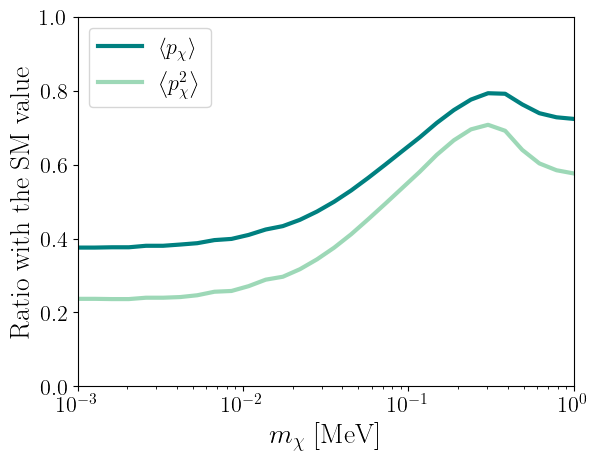

In [ ]:
f, ax=plt.subplots()
#ax.semilogx(mlist_T,gammaT,lw=3,c='Teal')
ax.semilogx(mlist_T,np.array(q_list)/p_photons(1),lw=3,c='teal')
ax.semilogx(mlist_T,np.array(qsq_list)/psq_photons(1),lw=3,c='mediumseagreen',alpha=0.5)



ax.set_xlabel('$m_\chi$ [MeV]',fontsize=20)
#ax.set_ylabel(r'$T_{\chi,\,\mathrm{eff}} / T_\gamma$',fontsize=20)
ax.set_ylabel('Ratio with the SM value',fontsize=20)
ax.set_ylim([0,1])
ax.set_xlim([1e-3,1])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend([r'$\left<p_\chi\right>$', r'$\left<p_\chi^2\right>$'],\
          fontsize=16,loc='upper left')

plt.savefig("Teff_new_plot_new.pdf",bbox_inches='tight')

In [ ]:
#everything in units of MeV (no conversions)
def temp(z):
    T0 = 2.33e-10 
    T = T0*(1+z)
    return T

def Hubble_therm(z):
    T = temp(z)
    #factor of 1.2 below is to account for baryons
    return np.sqrt(( np.pi**2/15 *T**4 + np.pi**2/30 *(7/8*6)*(4/11.)**(4/3.)*T**4 +\
                  4.35e-7* 2 *np.pi**2 *T**3* (2 + 7/8 * 6* 4/11)/45*1.2)/(3*Mpl**2))

def gx_max(mx, mA, v=1e-4):
    return 4e-5*v/1e-3*mx**(3/4.)*(10/np.log(mx**2*v**2/mA**2))**(1/4)

def sigmaT(mx, gx,z,mA):
    v = temp(z)/mx
    alphax = gx**2/(4*np.pi)
    return 8 * np.pi * alphax**2/(mx**2*v**4)*np.log((mx**2*v**2)/mA**2)

def find_ztherm(mx, gx, mA, guess=1e2):
    z = fsolve(lambda z: (nxrelic(mx, temp(z))*sigmaT(mx, gx, z, mA)*temp(z)/mx)/ Hubble_therm(z)-1, guess)
    return z



In [ ]:
zlist = [find_ztherm(m_production[i], Q_production[i]*e/1e-4, 1e-20) for i in range(len(m_production))]
zlist_highk = [find_ztherm(m_production[i], Q_production[i]*e/1e-3, 1e-20,guess=1) for i in range(len(m_production))]
zmax = [find_ztherm(m_production[i], gx_max(m_production[i], 1e-20), 1e-20, guess=10) for i in range(len(m_production))]
zmax_highv = [find_ztherm(m_production[i], gx_max(m_production[i], 1e-20, v=1e-3), 1e-15, guess=10) for i in range(len(m_production))]

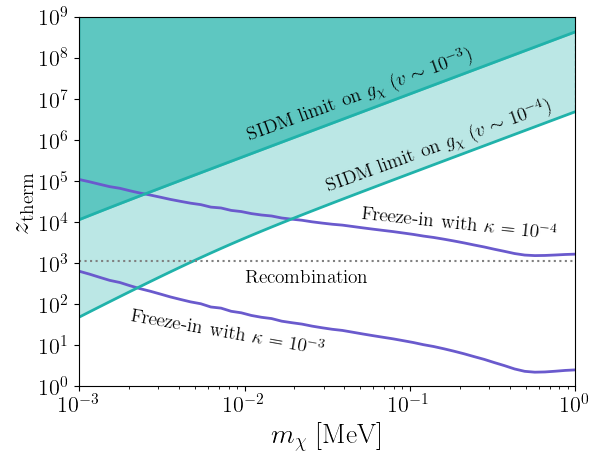

In [ ]:
f, ax = plt.subplots()

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)
ax.loglog(m_production, zlist, lw=2, c='Slateblue')

#ax.fill_between(x, y1, y2)#, color='lightseagreen', alpha=0.4)
ax.fill_between(m_production, np.array(zmax).flatten(), np.ones_like(m_production)*1e9, color='lightseagreen', alpha=0.3, linestyle='--')
ax.fill_between(m_production, np.array(zmax_highv).flatten(), np.ones_like(m_production)*1e9, color='lightseagreen', alpha=0.6)


ax.loglog(m_production, zlist_highk, lw=2, c='SlateBlue')
ax.loglog(m_production, zmax, lw=2, c='lightseagreen')
ax.loglog(m_production, zmax_highv, lw=2, c='lightseagreen')


ax.set_xlabel(r'$m_\chi$ [MeV]',fontsize=20)
#ax.set_ylabel(r'$T_{\chi,\,\mathrm{eff}} / T_\gamma$',fontsize=20)
ax.set_ylabel(r'$z_\mathrm{therm}$',fontsize=20)
ax.set_ylim([1e0,1e9])
ax.set_xlim([1e-3,1])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_yticks(np.logspace(0, 9, num=10))
#ax.set_yticklabels(np.logspace(0, 9, num=10),  fontsize=20)
ax.plot(m_production, np.ones_like(m_production)*1100, ls=":", c='gray')

ax.text(1e-2, 1e6, r'SIDM limit on $g_\chi$ ($v \sim 10^{-3}$)', rotation=20)
ax.text(3e-2, 6e4, r'SIDM limit on $g_\chi$ ($v \sim 10^{-4}$)', rotation=20)

ax.text(5e-2, 4e3, r'Freeze-in with $\kappa = 10^{-4}$', rotation=-6)
ax.text(2e-3, 6e0, r'Freeze-in with $\kappa = 10^{-3}$', rotation=-10)
ax.text(1e-2, 3.5e2, r'Recombination')
#ax.legend([r'$\left<p_\chi\right>$', r'$\left<p_\chi^2\right>$'],\
       #   fontsize=16,loc='upper left')
    
plt.savefig("DMselftherm_new_new.pdf",bbox_inches='tight')

7.230451466227853e+17
7.230451466227855e+17
2.8199446241486936
2.8199446241486927
2.6048436369642582e+17
2.6048436369642582e+17
7.274659580112827
7.274659580112827


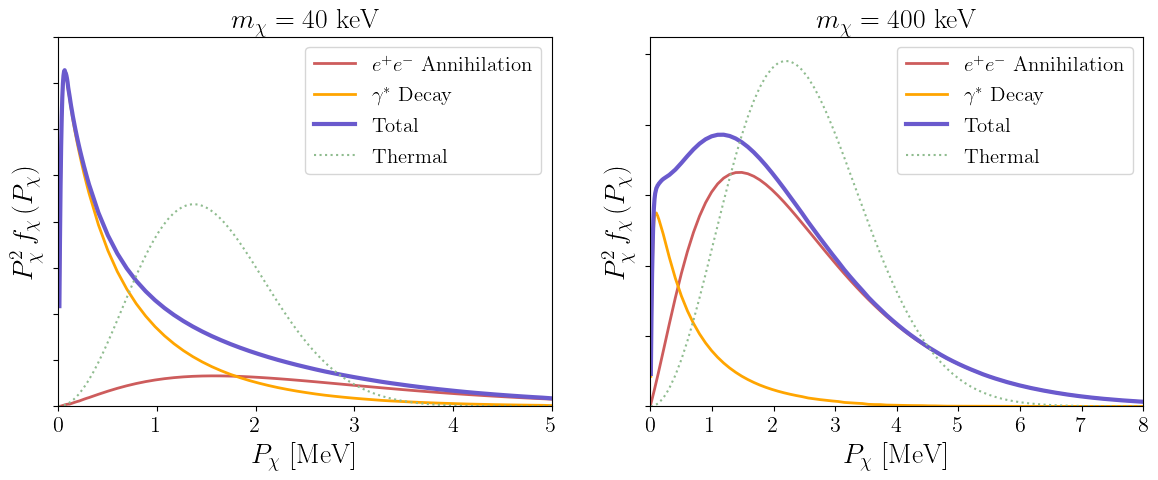

In [ ]:
f, axs=plt.subplots(1, 2)
#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))

ax=axs[0]
#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))
plist = np.concatenate((np.linspace(0.01, 0.3, num=50),np.linspace(0.31,5,num=50)))

#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,10,num=100)))
ax.plot(plist, ann40(plist)*plist**2,c='IndianRed',lw=2)
ax.plot(plist, medium40_plas*plist**2,c='orange',lw=2)
ax.plot(plist, (medium40_plas+ann40(plist))*plist**2,c='slateblue',lw=3)

plist=np.linspace(0,5,num=100)
#ax.plot(plist, 9.34e18*plist**2/(np.exp(plist/ 0.3929)+1),linestyle=":")

#ax.plot(plist, norm_rel_40*plist**2/(np.exp(plist/ T_rel_40)+1),linestyle=":") #comparing <p> not <p^2>
ax.plot(plist, norm_NR_40*plist**2*np.exp(-plist**2/(2*0.04*T_NR_40)),linestyle=":",c='darkseagreen')
print(integrate.quad(lambda p: norm_NR_40*p**2*np.exp(-p**2/(2*0.04*T_NR_40)), 0,np.inf)[0])
print(norm40)
print(integrate.quad(lambda p: norm_NR_40*p**4*np.exp(-p**2/(2*0.04*T_NR_40)), 0,np.inf)[0]/integrate.quad(lambda p: norm_NR_40*p**2*np.exp(-p**2/(2*0.04*T_NR_40)), 0,np.inf)[0])
print(qsq40)

ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_xlabel(r'$P_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$P_\chi^2\, f_\chi\left(P_\chi\right)$',fontsize=20)
ax.legend(['$e^+e^-$ Annihilation','$\gamma^*$ Decay','Total','Thermal','Thermal (nonrelativistic)'],fontsize=15)
ax.set_xlim([0,5])
ax.set_ylim([0,0.8e18])
ax.set_title(r'$m_\chi= 40$ keV', fontsize=20)

plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,5,num=30)))
#ax.plot(plist, interp40(plist))



ax=axs[1]
plist = np.concatenate((np.linspace(0.01, 0.3, num=30),np.linspace(0.31,10,num=100)))

#plist = np.concatenate((np.linspace(0.01, 0.1, num=20),np.linspace(0.1,10,num=100)))
ax.plot(plist, late400*plist**2,c='IndianRed',lw=2)
ax.plot(plist, late400_plas*plist**2,c='orange',lw=2)
ax.plot(plist, [late400_plas[i]+late400[i]for i in range(len(plist))]*plist**2,c='slateblue',lw=3)
ax.set_xlim([0,8])
ax.set_ylim([0,1.05e17])

#ax.plot(plist, 6.137e17*plist**2/(np.exp(plist/ 0.5782)+1),linestyle=":")

#ax.plot(plist, norm_rel_400*plist**2/(np.exp(plist/ T_rel_400)+1),linestyle=":") #with <p> conserved rather than <p^2>
ax.plot(plist, norm_NR_400*plist**2*np.exp(-plist**2/(2*0.4* T_NR_400)),linestyle=":",c='darkseagreen')
print(integrate.quad(lambda p: norm_NR_400*p**2*np.exp(-p**2/(2*0.4* T_NR_400)), 0, np.inf)[0])
print(norm400)
print(integrate.quad(lambda p: norm_NR_400*p**4*np.exp(-p**2/(2*0.4* T_NR_400)), 0, np.inf)[0]/integrate.quad(lambda p: norm_NR_400*p**2*np.exp(-p**2/(2*0.4* T_NR_400)), 0, np.inf)[0])
print(qsq400)
ax.set_yticklabels([])
ax.set_xticks(range(9))
ax.set_xticklabels(range(9), fontsize=16)

#ax.set_yscale('log')

#ax.set_xlabel(r'$\frac{p \,a}{a\left(T = 1\, \mathrm{MeV}\right)}$ [MeV]',fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_xlabel(r'$P_\chi$ [MeV]',fontsize=20)
ax.set_ylabel(r'$P_\chi^2\,f_\chi\left(P_\chi\right)$',fontsize=20)
ax.legend(['$e^+e^-$ Annihilation','$\gamma^*$ Decay','Total','Thermal'],fontsize=15)#'Thermal (relativistic)','Thermal (nonrelativistic)'],fontsize=15)
ax.set_title(r'$m_\chi= 400$ keV', fontsize=20)

plist = np.concatenate((np.linspace(0.01, 0.3, num=30),np.linspace(0.31,10,num=100)))
#ax.plot(plist, interp400(plist))

f.set_size_inches(14, 4.8)

plt.savefig("phase_comp_new_new.pdf",bbox_inches='tight')